**Abstract**


The problem I tackled is to create a Scikit-Learn based pipeline and an onnx model with the goal of maximizing accuracy of the model for out of sample data, given a dataset with no context. I performed data processing and analysis techniques on the data and having reduced the features to 2 principle components, I plotted them and found out that the data forms 3 clusters that have poor purity scores in terms of class labels. Having plotted the distributions of the data categorized by class label, I noticed that the distributions are very similar for the same feature between different classes. I have also analyzed descriptive statistics of the features categorized by class label and noticed that the statistics are very similar between different classes. based on this evidence, I made the assumption that the data set has a mistaken labeling and by performing a K-Means clustering on the dataset I have succesfully clustered the data into 3 distinct clusters with exceptionally good scores for model evaluation - Silhouette Score: 0.991725245125126. Hence, I conclude that the labeling for the data set is mistaken and the next steps would be to add context to the data and investigate the reason behind the mistaken labeling and make sure that the new labeling makes sense as well.


**Overview** 

*Problem statement:* Given a dataset with no context, create a Scikit-Learn based pipeline and an onnx model with the goal of maximizing accuracy of the model for out of sample data.


*Relevant literature:* Please see bibliography.


*Proposed methodology:* The steps of the methodology include data processing and analysis, model training and validation. These steps involve:
-  performing exploratory data analysis to analyze the dataset in terms of predictive power of the features. 
- visualizing distributions of data points under each class and analyzing the similarity/difference in distribution. 
- cleaning the data by searching for null values, duplicates and outliers.
-  looking for class imbalances. 
- eliminating redundant features by examining the heatmap, reducing the number of features by perfoming PCA. 
- deciding on the type of model to build based on previous analysis and building the model.
- using PySpark, which will take advantage of parallelism techniques, to build the model due to the big volume of data.
- evaluating the model, tweaking hyperparameters accordingly.
- creating a pipeline of the steps taken to buiold the model.
- exporting the final model as an onnx.



**Data Processing and Analysis**

- Pipeline details, data issues, assumptions/adjustments.
- Summary statistics, visualization, feature extraction.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IIT/3rd year/sem II/cs_422/project/data_public.csv', header=0, sep=',',
quotechar='"')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
df.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.068656e+01,-1.883373e+01,7.162152e+01,-1.355120e+01,2.944177e+01,-6.185189e+00,3.174186e+01,5.112504e+01,3.300077e+01,4.092546e+01,7.938340e+01,-6.746540e+00,-4.232290e+01,4.949012e+01,5.980333e+01,2.167323e+00
std,1.292492e+02,1.446355e+01,1.052808e+02,4.689774e+01,7.282278e+01,7.309100e+01,6.660329e+01,1.034053e+02,4.217119e+01,7.694386e+01,9.484003e+01,1.557490e+01,1.791142e+01,6.728231e+01,6.677712e+01,6.874930e-01
min,-7.308940e+01,-8.322357e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-6.271828e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.793679e+01,-1.786669e+01,7.553164e+00,-1.471337e+01,-2.436286e+01,-3.072492e+01,-3.484185e+00,-2.629661e+01,-7.594991e+00,2.108044e+01,2.419273e+00,-8.875128e+00,-5.567326e+01,-7.131906e+00,1.628438e-01,2.000000e+00
50%,-3.197847e+01,-1.369876e+01,1.348796e+01,-8.004308e+00,-1.897058e+01,-2.475391e+01,1.491431e+00,-1.817028e+01,3.769369e+01,2.717432e+01,2.652955e+01,-1.079123e+00,-5.297585e+01,1.462293e+01,4.689262e+01,2.000000e+00
75%,2.280020e+02,-1.055606e+01,2.123439e+02,1.955806e+01,1.289018e+02,7.834417e+01,1.151840e+02,1.915891e+02,7.984842e+01,1.253846e+02,2.046458e+02,3.334451e+00,-2.208504e+01,1.363603e+02,1.451293e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


First, we are checking the data for null values, and as we can observe there are none. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB


In [ ]:
#percentage of null values for each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

A - 0%
B - 0%
C - 0%
D - 0%
E - 0%
F - 0%
G - 0%
H - 0%
I - 0%
J - 0%
K - 0%
L - 0%
M - 0%
N - 0%
O - 0%
Class - 0%


Then, we are plotting histograms for each feature and separate the values by class. This is for visualization purposes to spot outliers and to observe the differences in distribution between classes for each feature. As we can observe, for all features, all classes have very similar distributions, which is a sign of little difference between feature values for different classes. Since the shape of the distribution for each class is the same per feature, the only difference being the number of records for each class, there is probably little predictive power in this dataset. We can visually observe that there are no outliers. My assumption is that the dataset does not contain useful information for distinction between the classes, and I am expecting the future model to be built to have low accuracy and low performance.

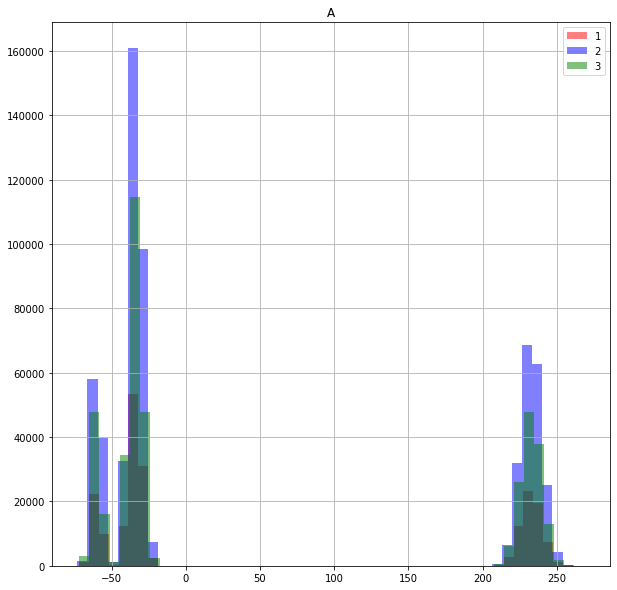

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

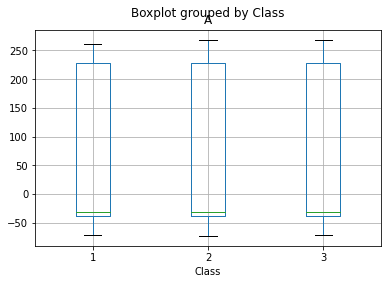

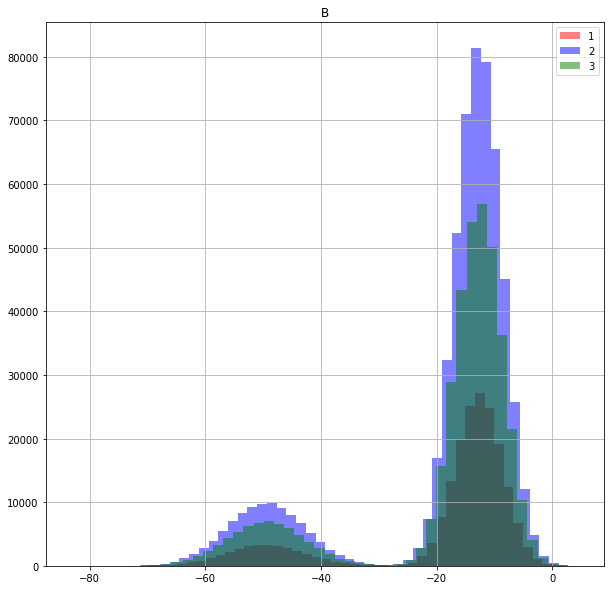

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

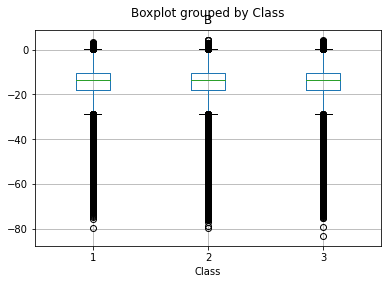

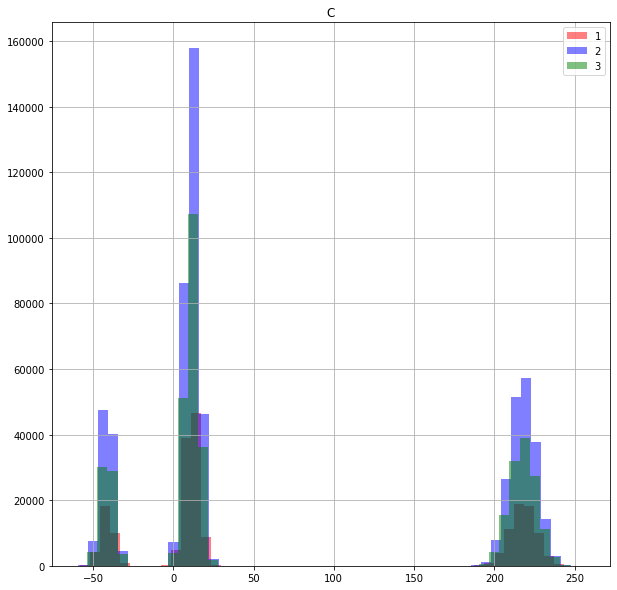

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

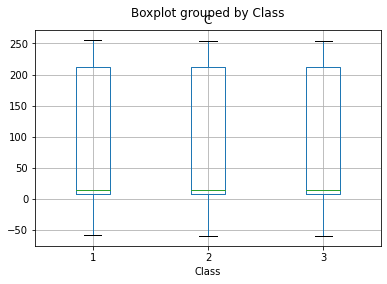

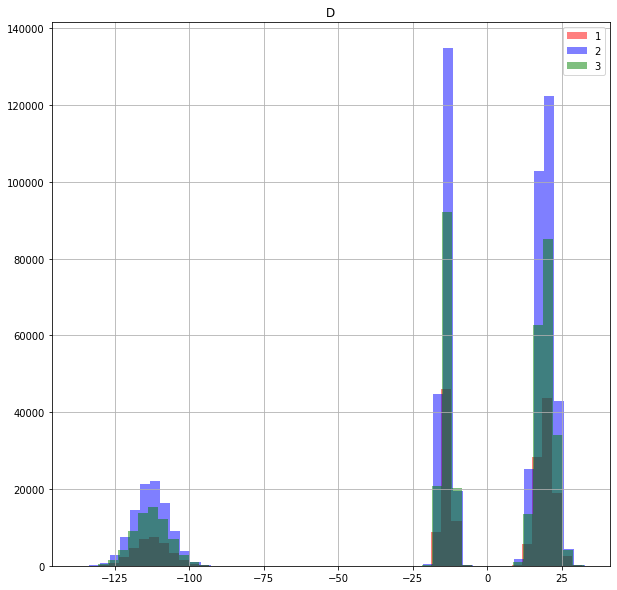

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

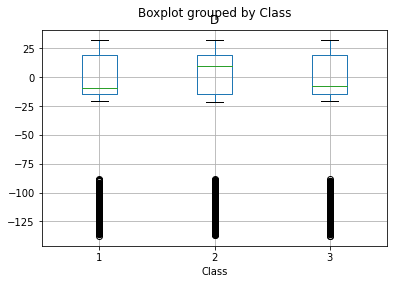

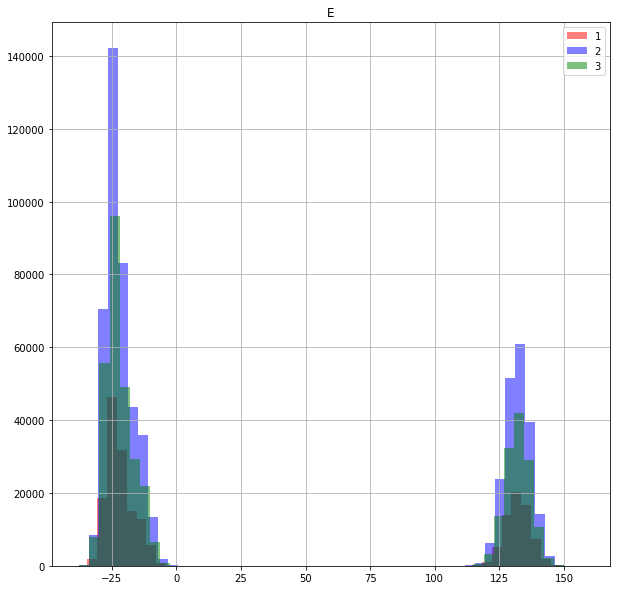

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

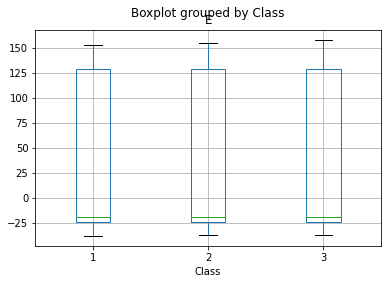

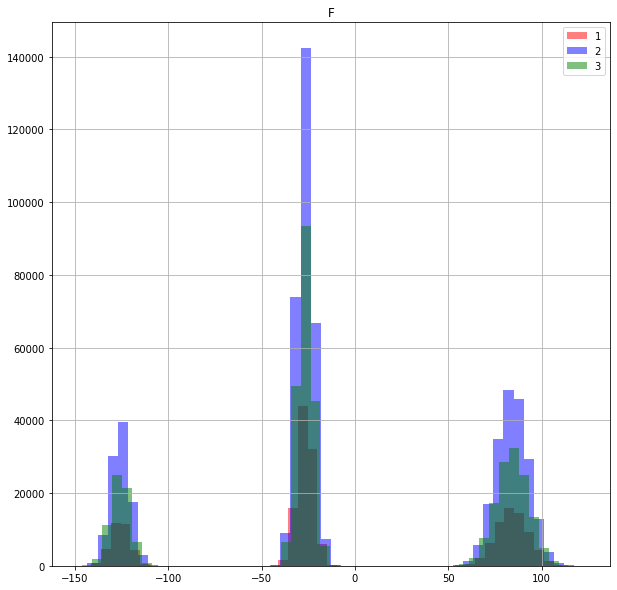

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

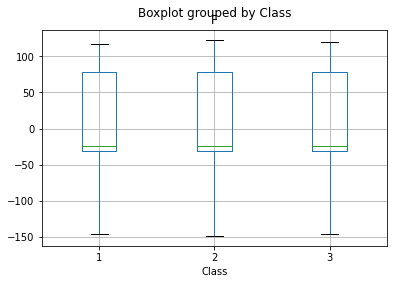

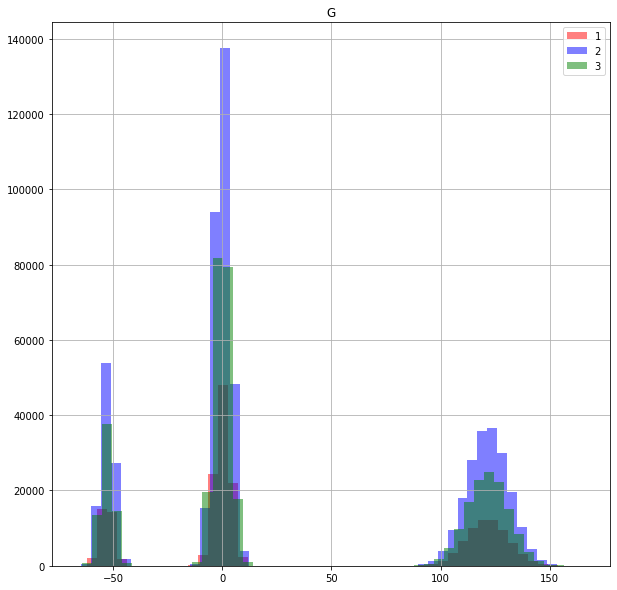

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

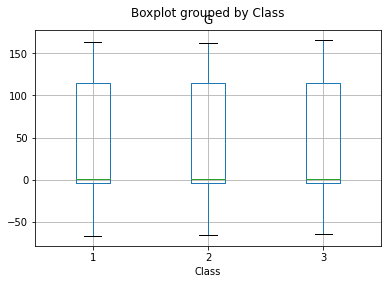

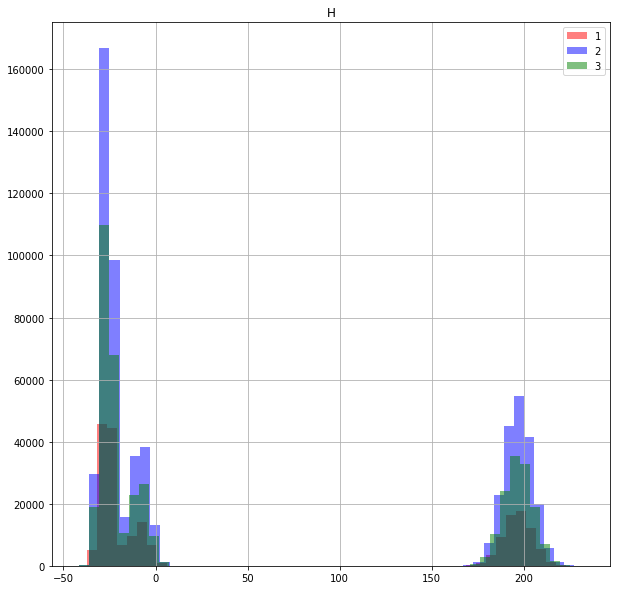

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

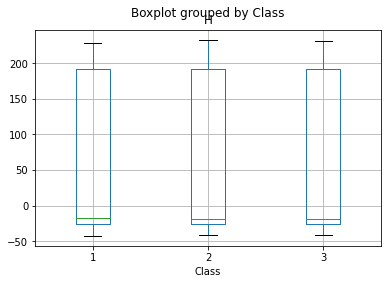

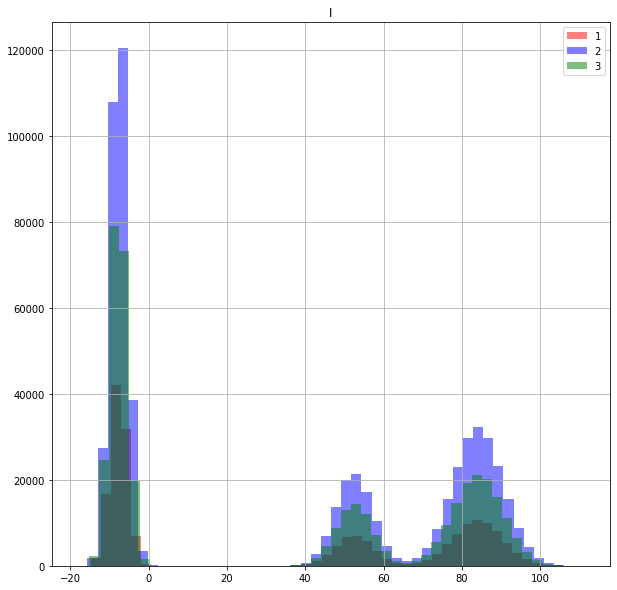

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

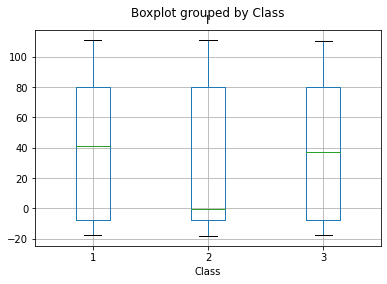

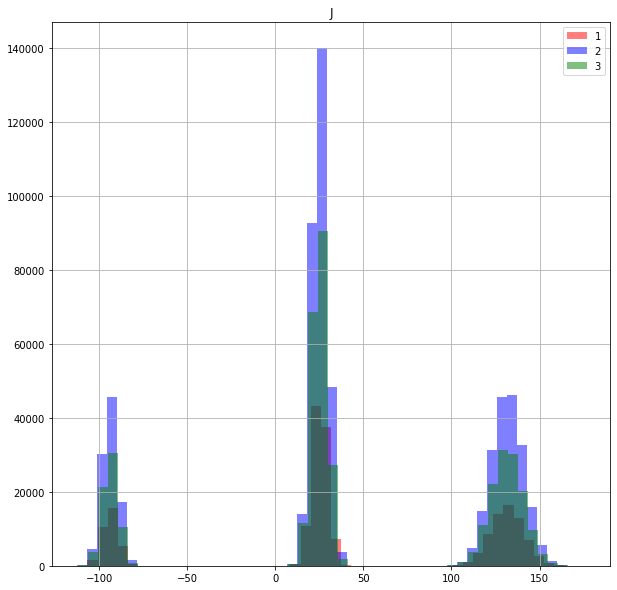

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

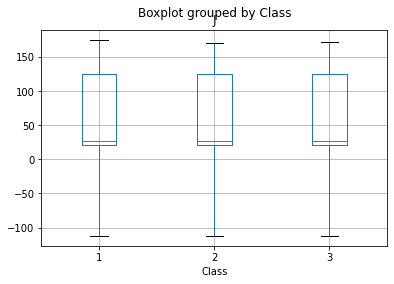

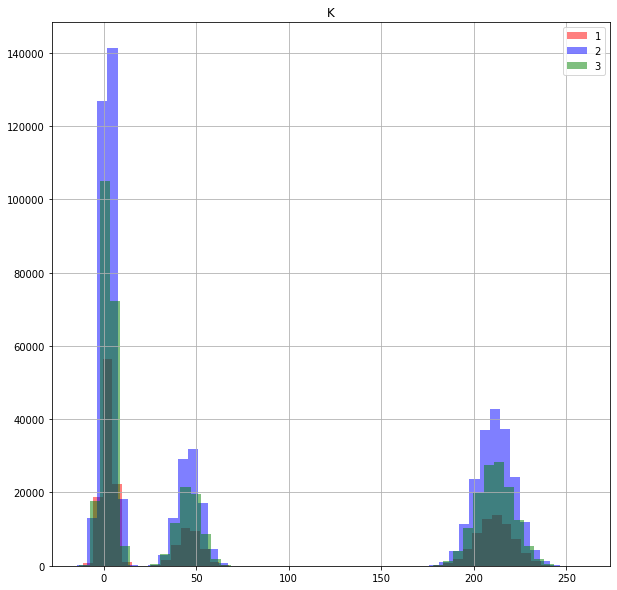

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

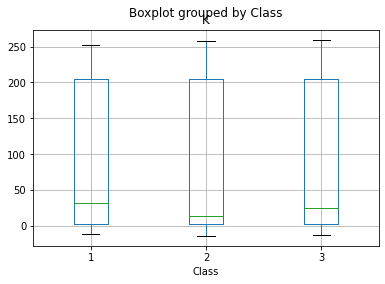

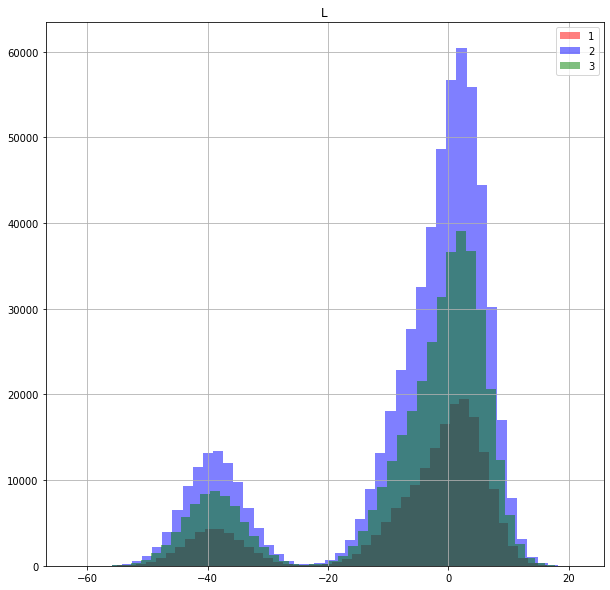

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

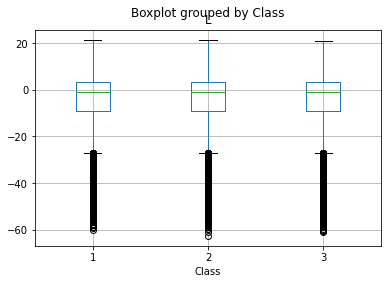

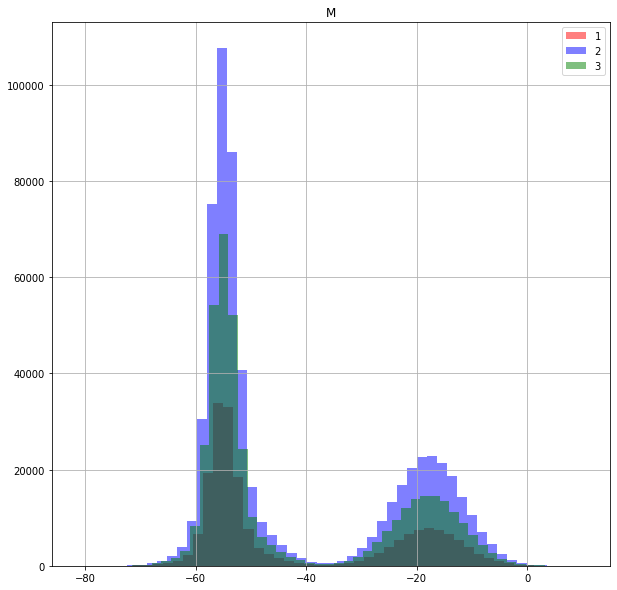

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

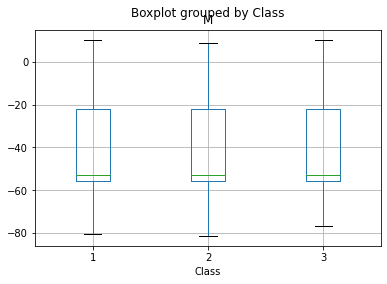

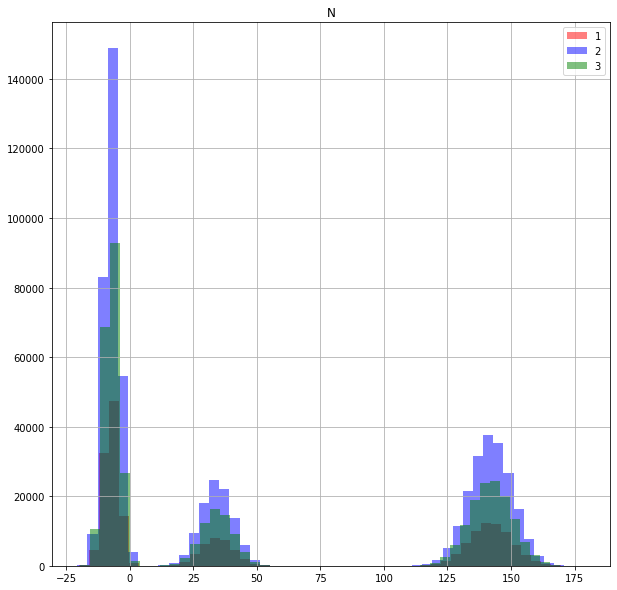

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

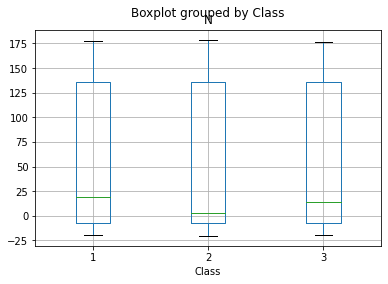

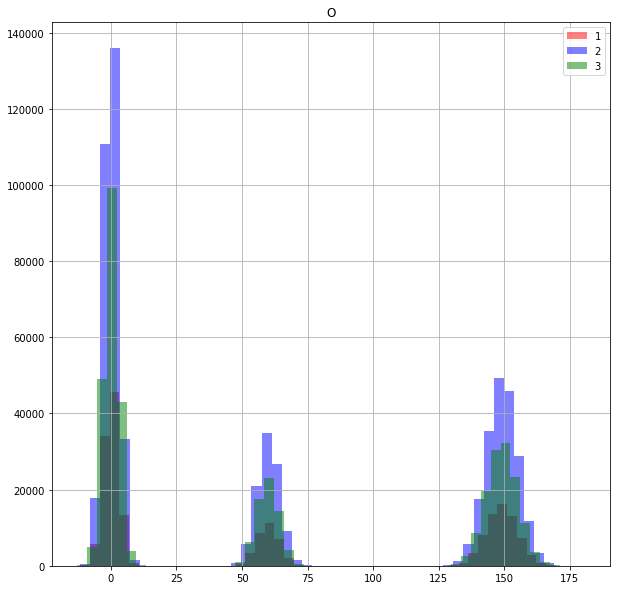

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

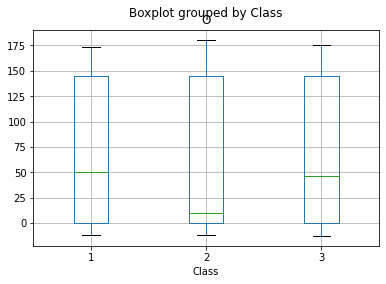

In [ ]:
#histograms and box plots for numerical features
for col in df.columns.drop('Class'):
  plt.figure(figsize=(10,10))
  plt.title(col)
  df[df['Class'] == 1][col].hist(bins=50, alpha = 0.5, label='1', color = 'red')
  df[df['Class'] == 2][col].hist(bins=50, alpha = 0.5, label='2', color = 'blue')
  df[df['Class'] == 3][col].hist(bins=50, alpha = 0.5, label='3', color = 'green')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,10))
  df.boxplot(column = col, by = 'Class');
  plt.title(col)
  plt.show()

Here we are checking the number of records in each class to check for oversampling. As expected, the biggest amount of records are in class 2, then in class 3, and then class 1; however, the difference is not big enough to get in the way of our model's performance, so we leave it as is.

In [ ]:
df[df['Class'] == 1].shape

(199992, 16)

In [ ]:
df[df['Class'] == 2].shape

(599228, 16)

In [ ]:
df[df['Class'] == 3].shape

(400780, 16)

To further explore the difference between different classes for each feature, I am calculating the difference between descriptive statistics between pairs of classes. We can notice that there's little to no difference as expected and hence the distributions for each feature are very similar for each class.

In [ ]:
df[df['Class'] == 1].describe() - df[df['Class'] == 2].describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.000000,-399236.0
mean,0.014112,-0.061375,-0.022759,-0.172312,0.041315,-0.109379,-0.076217,0.069962,0.101613,-0.136976,0.114101,-0.058439,0.008233,0.086391,0.092306,-1.0
std,0.027102,0.048648,0.098017,0.102113,-0.006066,0.156673,0.055077,-0.007062,-0.006212,0.150259,-0.005661,0.020854,-0.007273,-0.038892,-0.047022,0.0
min,1.154649,-0.200015,1.247040,-0.314716,-0.498252,2.103155,-1.700846,-1.001758,0.941681,-0.090721,3.212041,2.704310,1.056423,0.643557,0.238667,-1.0
25%,-0.061575,-0.037502,-0.035269,-0.008721,0.008441,-0.048066,-0.006978,0.022723,0.011263,-0.011306,0.015273,-0.068398,-0.001054,0.041810,0.003190,-1.0
50%,-0.003664,-0.009315,-0.026552,-19.161675,0.054251,0.009382,-0.035113,0.342450,41.394857,0.006746,17.829183,-0.037308,0.025356,16.612257,40.247779,-1.0
75%,-0.015734,-0.022357,0.112046,0.012486,-0.007241,0.036142,-0.098973,0.024790,0.042592,0.036897,0.054974,-0.029186,0.046135,0.004365,-0.036634,-1.0
max,-6.717222,-1.220505,1.978934,-0.700364,-1.517208,-6.023952,0.963646,-4.598153,-0.492407,4.507946,-5.567216,-0.226558,1.406440,-1.172269,-7.352368,-1.0


In [ ]:
df[df['Class'] == 1].describe() - df[df['Class'] == 3].describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.000000,-200788.0
mean,0.202194,-0.023381,0.171603,-0.069161,0.129281,0.064673,0.054852,0.192354,0.110382,0.022176,0.196692,-0.021163,0.031783,0.145992,0.143360,-2.0
std,0.079859,0.018522,0.126993,0.010879,0.024907,0.109981,0.046436,0.065284,0.020120,0.078707,0.054292,-0.011818,0.015852,0.021593,0.005427,0.0
min,-0.135238,3.405031,1.579057,0.351405,-0.759732,-0.600333,-2.066279,-1.057095,0.462246,-0.396331,2.048869,0.855189,-3.729694,-0.235146,1.184487,-2.0
25%,-0.040527,-0.016145,0.022814,0.003766,0.000926,-0.036184,0.008421,-0.003195,0.007218,-0.016494,0.005208,-0.022779,0.001863,0.030965,0.011958,-2.0
50%,-0.006256,-0.003257,0.009536,-1.399084,0.054201,0.026812,-0.018238,0.284369,3.769452,0.007027,5.936283,-0.022591,0.019365,5.334594,3.537701,-2.0
75%,0.019976,-0.017055,0.205783,0.020347,-0.001469,0.088319,-0.029616,0.114938,0.088076,0.019455,0.101259,-0.041154,0.084967,0.035252,-0.015802,-2.0
max,-7.933791,-1.208491,2.979014,-0.347546,-5.375137,-2.702728,-2.795071,-1.999821,0.098230,3.741951,-8.011006,0.415015,0.166059,0.804118,-1.576152,-2.0


In [ ]:
df[df['Class'] == 2].describe() - df[df['Class'] == 3].describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.000000,198448.0
mean,0.188082,0.037994,0.194362,0.103151,0.087966,0.174052,0.131069,0.122392,0.008769,0.159152,0.082592,0.037275,0.023550,0.059601,0.051054,-1.0
std,0.052757,-0.030126,0.028976,-0.091234,0.030973,-0.046692,-0.008640,0.072346,0.026333,-0.071553,0.059953,-0.032672,0.023125,0.060485,0.052449,0.0
min,-1.289886,3.605046,0.332016,0.666120,-0.261480,-2.703487,-0.365432,-0.055337,-0.479436,-0.305610,-1.163172,-1.849122,-4.786117,-0.878703,0.945819,-1.0
25%,0.021048,0.021357,0.058083,0.012487,-0.007515,0.011882,0.015399,-0.025918,-0.004046,-0.005188,-0.010065,0.045619,0.002917,-0.010845,0.008768,-1.0
50%,-0.002592,0.006058,0.036088,17.762591,-0.000050,0.017430,0.016875,-0.058081,-37.625405,0.000280,-11.892900,0.014717,-0.005992,-11.277664,-36.710078,-1.0
75%,0.035710,0.005302,0.093737,0.007861,0.005772,0.052178,0.069357,0.090148,0.045485,-0.017442,0.046285,-0.011969,0.038832,0.030887,0.020832,-1.0
max,-1.216569,0.012014,1.000080,0.352818,-3.857929,3.321224,-3.758717,2.598332,0.590637,-0.765995,-2.443790,0.641572,-1.240381,1.976387,5.776216,-1.0


In [ ]:
df[df['Class'] == 1].describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.000000,199992.0
mean,50.761137,-18.872184,71.667468,-13.660347,29.505583,-6.218209,31.722124,51.224216,33.088379,40.864463,79.506069,-6.782790,-42.308173,49.582023,59.897306,1.0
std,129.289522,14.494003,105.372183,46.952329,72.828109,73.205968,66.646328,103.423615,42.174821,77.045186,94.855390,15.581350,17.913087,67.270138,66.755485,0.0
min,-71.934753,-79.818540,-58.149478,-137.230444,-38.298257,-146.488573,-66.541371,-42.460894,-17.243735,-112.384444,-10.940291,-60.013966,-80.393454,-19.936234,-11.646107,1.0
25%,-37.981198,-17.890670,7.542468,-14.716195,-24.358047,-30.760140,-3.484199,-26.286567,-7.586688,21.069103,2.428484,-8.916993,-55.673178,-7.100692,0.168486,1.0
50%,-31.982436,-13.704514,13.477783,-9.149429,-18.926234,-24.740551,1.468100,-17.904522,40.994716,27.180167,31.355009,-1.105289,-52.956642,19.199439,49.748248,1.0
75%,228.002313,-10.572909,212.468120,19.570959,128.897177,78.392618,115.124221,191.639974,79.900053,125.408335,204.705672,3.305744,-22.033919,136.374372,145.106677,1.0
max,260.840049,3.239603,256.169843,31.937629,152.609122,116.894689,163.258345,228.351451,110.804605,175.539703,251.789305,21.368399,10.328284,177.758080,173.348765,1.0


In [ ]:
df[df['Class'] == 2].describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.000000,599228.0
mean,50.747025,-18.810809,71.690227,-13.488035,29.464268,-6.108830,31.798341,51.154254,32.986766,41.001438,79.391968,-6.724351,-42.316406,49.495632,59.805000,2.0
std,129.262420,14.445355,105.274166,46.850216,72.834175,73.049295,66.591251,103.430678,42.181033,76.894927,94.861051,15.560496,17.920360,67.309030,66.802507,0.0
min,-73.089401,-79.618525,-59.396519,-136.915728,-37.800005,-148.591728,-64.840524,-41.459135,-18.185416,-112.293723,-14.152332,-62.718276,-81.449877,-20.579791,-11.884775,2.0
25%,-37.919623,-17.853168,7.577737,-14.707474,-24.366488,-30.712074,-3.477220,-26.309291,-7.597951,21.080408,2.413211,-8.848595,-55.672124,-7.142501,0.165297,2.0
50%,-31.978772,-13.695199,13.504335,10.012246,-18.980485,-24.749933,1.503213,-18.246971,-0.400141,27.173421,13.525825,-1.067981,-52.981999,2.587182,9.500469,2.0
75%,228.018047,-10.550553,212.356074,19.558473,128.904418,78.356477,115.223194,191.615184,79.857462,125.371438,204.650698,3.334930,-22.080055,136.370007,145.143311,2.0
max,267.557271,4.460108,254.190909,32.637993,154.126330,122.918640,162.294700,232.949604,111.297012,171.031757,257.356521,21.594956,8.921844,178.930350,180.701133,2.0


In [ ]:
df[df['Class'] == 3].describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.000000,400780.0
mean,50.558943,-18.848803,71.495865,-13.591186,29.376302,-6.282881,31.667272,51.031862,32.977997,40.842286,79.309377,-6.761627,-42.339956,49.436031,59.753946,3.0
std,129.209663,14.475481,105.245191,46.941450,72.803202,73.095987,66.599891,103.358331,42.154700,76.966479,94.801098,15.593168,17.897235,67.248544,66.750058,0.0
min,-71.799515,-83.223570,-59.728535,-137.581849,-37.538525,-145.888240,-64.475092,-41.403798,-17.705980,-111.988113,-12.989160,-60.869155,-76.663760,-19.701088,-12.830594,3.0
25%,-37.940671,-17.874524,7.519654,-14.719961,-24.358974,-30.723956,-3.492620,-26.283373,-7.593905,21.085597,2.423276,-8.894214,-55.675041,-7.131657,0.156528,3.0
50%,-31.976180,-13.701258,13.468247,-7.750345,-18.980434,-24.767362,1.486338,-18.188890,37.225264,27.173141,25.418726,-1.082698,-52.976007,13.864846,46.210547,3.0
75%,227.982337,-10.555855,212.262337,19.550612,128.898646,78.304299,115.153837,191.525036,79.811977,125.388880,204.604413,3.346899,-22.118886,136.339121,145.122478,3.0
max,268.773840,4.448094,253.190829,32.285175,157.984260,119.597416,166.053416,230.351271,110.706374,171.797752,259.800312,20.953384,10.162225,176.953963,174.924917,3.0


Then, we check if there are any non numeric columns, and as wee can see, all columns are numeric. Hence, no transformations to non numerical columns needed.

In [ ]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'Class']
[]


Then we check for features with repetitive values and hence uninformative. Even with a threshold as low as 30% of records to be duplicates, there are no repetitive features except for 'Class', which is expected. That is good news.

In [ ]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.30:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Class: 49.93567%
2    599228
3    400780
1    199992
Name: Class, dtype: int64



Here we check if there are any duplicates whatsoever and as we can observe there are absolutely no duplicates.

In [ ]:
df_dedupped = df.drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(1200000, 16)
(1200000, 16)


Here I explore the correlations between features, and as we can observe there are weak correlations between features - hence no redundant faetures.

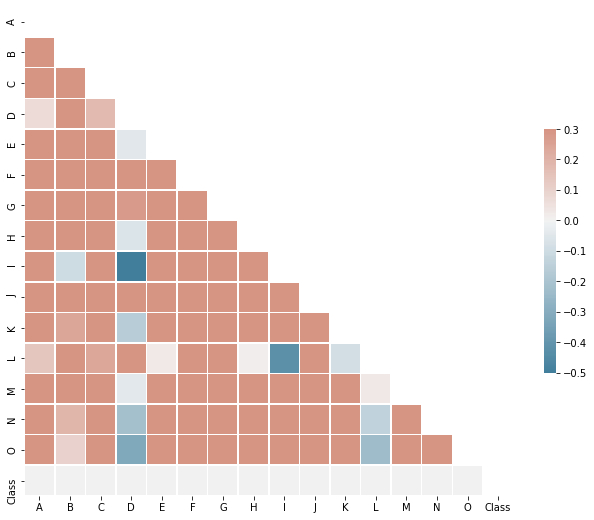

In [ ]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Here I am separating the dataset into x = feature columns and y = target column. I also standardize the features.

In [ ]:
x = df.drop(columns=['Class'])
# Separating out the target
y = df.loc[:,['Class']]
# Standardizing the columns
x = StandardScaler().fit_transform(x)

In an attempt to reduce the number of features, I am performing PCA and reducing the dataset to 5 principle components as a start and analyzing the amount of variance explained by these 5 PCs.  

In [ ]:
pca = PCA(n_components=5) # Reducing the number of components
principal_components = pca.fit_transform(x) #perform PCA
principal_df = pd.DataFrame(data = principal_components
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
df_pca = pd.concat([principal_df, df[['Class']]], axis = 1)

In [ ]:
print("Percentage of variance explained by each component")
print(np.round(pca.explained_variance_ratio_, decimals=4)*100)

Percentage of variance explained by each component
[73.39 24.9   0.59  0.41  0.35]


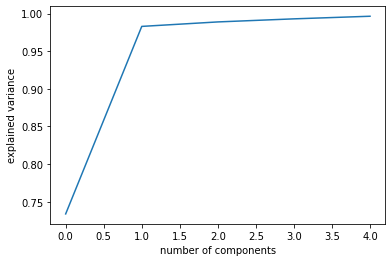

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

After ploting the # of components vs explained variance and printing out the amount of variance explained by each principle component, I choose to limit the number of principle components to 2, which explain 92.15% of the variance. A perk of choosing 2 PCs is also the fact that I can make a 2D plot and see the data more clearly, while not loosing too much of the information.

In [ ]:
pca = PCA(n_components=2) # Reducing the number of components to three.
principal_components = pca.fit_transform(x) #perform PCA
principal_df = pd.DataFrame(data = principal_components
             , columns = ['pc1', 'pc2'])
df_pca = pd.concat([principal_df, df[['Class']]], axis = 1)

In [ ]:
print("Percentage of variance explained by each component")
print(np.round(pca.explained_variance_ratio_, decimals=4)*100)

Percentage of variance explained by each component
[73.39 24.9 ]


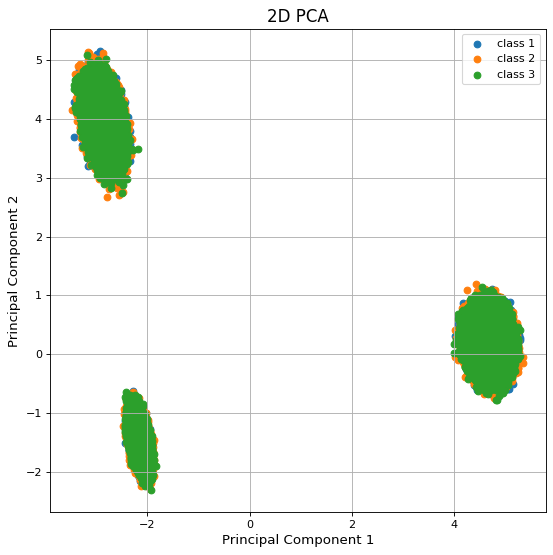

In [ ]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df_pca.loc[df_pca['Class'] == 1, 'pc1'], 
                df_pca.loc[df_pca['Class'] == 1, 'pc2'])
plt.scatter(df_pca.loc[df_pca['Class'] == 2, 'pc1'], 
                df_pca.loc[df_pca['Class'] == 2, 'pc2'])
plt.scatter(df_pca.loc[df_pca['Class'] == 3, 'pc1'], 
                df_pca.loc[df_pca['Class'] == 3, 'pc2'])
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['class 1', 'class 2', 'class 3'])
plt.grid()

After plotting the data with only 2 features now, which are the 2 principle components, we can observe that the data forms 3 distinct clusters that impure containing data points from all 3 classes. Hence, my intuition is that the labeling is mistaken and I will run a K-Means clustering algorithm on it to classify the data into 3 clusters.

**Model Training and Model Validation** 
- Feature engineering, evaluation metrics, model selection.
- Testing results, performance criteria, biases/risks.

As I said, I am running K-Means on my data with k = 3, however given that my data has 1,200,000 datapoints, it was taking too long to execute. This is why I installed PySpark to take advantage of the data parallelism. 

In [ ]:
'''
clust_model = KMeans(n_clusters=3,
                    init='k-means++')
clust_labels = clust_model.fit_predict(df_pca)
silhouette_avg = metrics.silhouette_score(df_pca,
                                        clust_labels)
'''

"\nclust_model = KMeans(n_clusters=3,\n                    init='k-means++')\nclust_labels = clust_model.fit_predict(df_pca)\nsilhouette_avg = metrics.silhouette_score(df_pca,\n                                        clust_labels)\n"

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
!pip install py4j

     |████████████████████████████████| 204kB 5.1MB/s 


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
!ls

drive  sample_data  spark-3.1.1-bin-hadoop3.2  spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
import findspark
findspark.init("spark-3.1.1-bin-hadoop3.2")# SPARK_HOME

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Clustering using K-Means').getOrCreate()
df_spark = spark.read.csv('/content/drive/MyDrive/IIT/3rd year/sem II/cs_422/project/data_public.csv', header=True, inferSchema=True)
df_spark.printSchema()

root
 |-- A: double (nullable = true)
 |-- B: double (nullable = true)
 |-- C: double (nullable = true)
 |-- D: double (nullable = true)
 |-- E: double (nullable = true)
 |-- F: double (nullable = true)
 |-- G: double (nullable = true)
 |-- H: double (nullable = true)
 |-- I: double (nullable = true)
 |-- J: double (nullable = true)
 |-- K: double (nullable = true)
 |-- L: double (nullable = true)
 |-- M: double (nullable = true)
 |-- N: double (nullable = true)
 |-- O: double (nullable = true)
 |-- Class: integer (nullable = true)



In [ ]:
from pyspark.ml.feature import VectorAssembler
df_spark.columns

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'Class']

In [ ]:
assemble = VectorAssembler(inputCols=[
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O'], outputCol='features')
assembled_data = assemble.transform(df_spark)
assembled_data.show(2)

+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----+--------------------+
|                 A|                  B|                 C|                  D|                  E|                  F|                  G|                 H|                 I|                 J|                 K|                 L|                  M|                  N|                 O|Class|            features|
+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----+--------------------+
| 231.4200228005195|-12.2109843174914

In [ ]:
from pyspark.ml.feature import StandardScaler as pyspark_StandardScaler
scale = pyspark_StandardScaler(inputCol='features',outputCol='standardized')
data_scale = scale.fit(assembled_data)
data_scale_output = data_scale.transform(assembled_data)
data_scale_output.show(2)

+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----+--------------------+--------------------+
|                 A|                  B|                 C|                  D|                  E|                  F|                  G|                 H|                 I|                 J|                 K|                 L|                  M|                  N|                 O|Class|            features|        standardized|
+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----+-----------------

Once I have installed PySpark and got my data set up, I can go ahead and run K-Means algorithm with 3 clusters. It was very fast and I obtained a Silhouette Score of 0.9831, which is a very good score,  since a score of 1 is the best. 

In [ ]:
from pyspark.ml.clustering import KMeans as pyspark_KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score =[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')


KMeans_algo = pyspark_KMeans(featuresCol='standardized', k=3)
KMeans_fit = KMeans_algo.fit(data_scale_output)
output = KMeans_fit.transform(data_scale_output)

score = evaluator.evaluate(output)
silhouette_score.append(score)
print("Silhouette Score:",score)

Silhouette Score: 0.9831817667951103


Then, I decided to try running K-Means again, but this time after performing PCA and creating 3 principle components. The Silhouette Score is slightly better for the K-Means model ran on PC - 0.9917. This is great news - it means that I can use only 3 features and get same performance or even slightly better.

In [ ]:
from pyspark.ml.feature import PCA as pyspark_PCA
from pyspark.mllib.linalg import Vectors

pca = pyspark_PCA(k=3, inputCol='standardized', outputCol='pcaFeatures')
model = pca.fit(data_scale_output)
result = model.transform(data_scale_output).select('pcaFeatures')
result.show(truncate=False)

+-------------------------------------------------------------+
|pcaFeatures                                                  |
+-------------------------------------------------------------+
|[-5.649248552774207,1.6368330601666248,-0.701501725654098]   |
|[1.4130191792466693,-0.24916671300505974,-0.6319176085113155]|
|[1.3445193101975372,-0.11055438478092545,-1.1079952093741048]|
|[-5.570451744609498,1.1583056681727353,-0.4642459215615772]  |
|[-5.599081579905665,1.4778115824078246,-0.8987267674824776]  |
|[-5.1740134765203125,1.2289537447756251,-1.1334454083464165] |
|[1.4209559225631323,0.03637623211183531,-0.546439523544067]  |
|[1.30439269011465,-0.2061048663480787,-0.8485911818499743]   |
|[1.3086235251483427,-0.16749718223244464,-0.3461285961345995]|
|[-5.444931124691445,1.6951734727135168,-0.36803755174253805] |
|[-5.595232703242705,1.3667568741288036,-0.8826570486457634]  |
|[1.2080058964388822,-0.3747972110142023,-0.7287259245248157] |
|[1.3459288232158262,-0.3788960260559229

In [ ]:
silhouette_score =[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='pcaFeatures',
                                metricName='silhouette', distanceMeasure='squaredEuclidean')


KMeans_algo = pyspark_KMeans(featuresCol='pcaFeatures', k=3)
KMeans_fit = KMeans_algo.fit(result)
output = KMeans_fit.transform(result)

score = evaluator.evaluate(output)
silhouette_score.append(score)
print("Silhouette Score:",score)

Silhouette Score: 0.991725245125126


  Here, I am comparing the clusters formed with the class labels to check the purity of clusters compared to the classes. I am doing this by using homogeneity and completeness scores.

In [ ]:
output.show(5)

+--------------------+----------+
|         pcaFeatures|prediction|
+--------------------+----------+
|[-5.6492485527742...|         1|
|[1.41301917924666...|         0|
|[1.34451931019753...|         0|
|[-5.5704517446094...|         1|
|[-5.5990815799056...|         1|
+--------------------+----------+
only showing top 5 rows



In [ ]:
classes = data_scale_output.select('Class').toPandas()
classes = classes.astype('int32') - 1
classes.head(5)

,Class
0,1
1,2
2,1
3,1
4,2


In [ ]:
predictions = output.select('prediction').toPandas()
predictions.head(5)

,prediction
0,1
1,0
2,0
3,1
4,1


In [ ]:
h_score = metrics.homogeneity_score(classes.values.flatten(),
                                    predictions.values.reshape(-1))
print("h_score:", h_score)

c_score = metrics.completeness_score(classes.values.flatten(),
                                    predictions.values.reshape(-1))
print("c_score:", c_score)

h_score: 1.3370493295307152e-06
c_score: 1.3372325722985866e-06


A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. Since in this case both scores are 0.0001337%, we can conclude that the labeling does not correspond to the clustering at all, and hence the labeling is wrong. I will go on and build this K-Means model as my final model that would hopefully classify the data points correctly.

My assumption is that besides the class labels, the data tends to cluster in 3 clumps, so I will separate the dataset according to these 3 clusters and explore the data for each cluster separetly.

In [ ]:
df['Cluster'] = predictions

In [ ]:
clust0 = df.loc[df['Cluster'] == 0]
clust0 = clust0.drop(columns=['Cluster'])
clust1 = df.loc[df['Cluster'] == 1]
clust1 = clust1.drop(columns=['Cluster'])
clust2 = df.loc[df['Cluster'] == 2]
clust2 = clust2.drop(columns=['Cluster'])

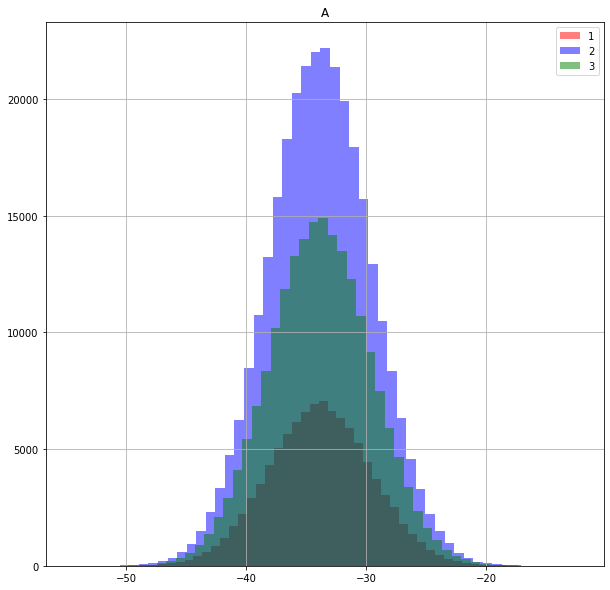

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

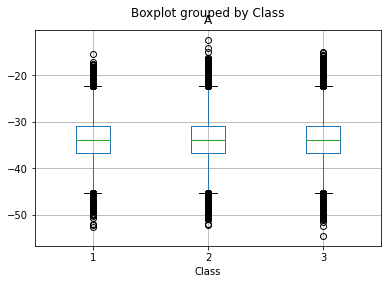

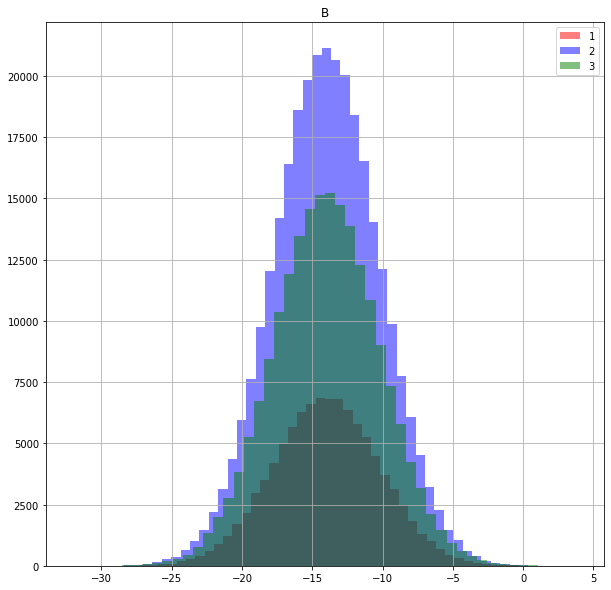

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

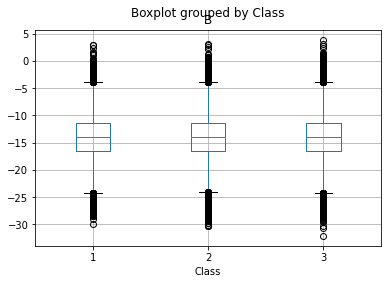

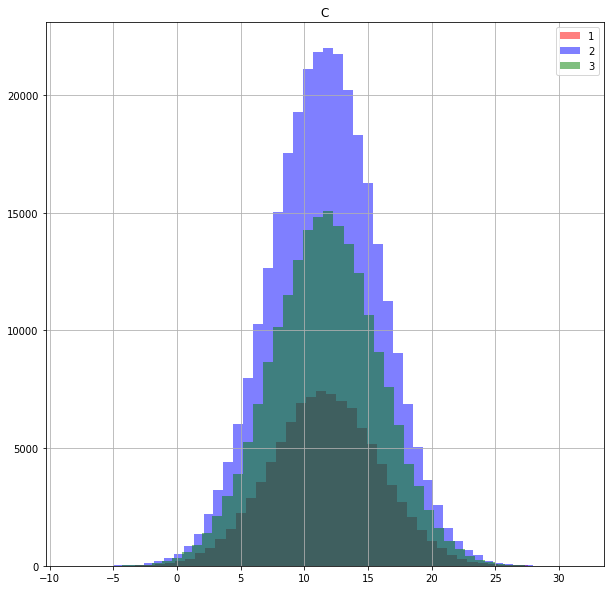

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

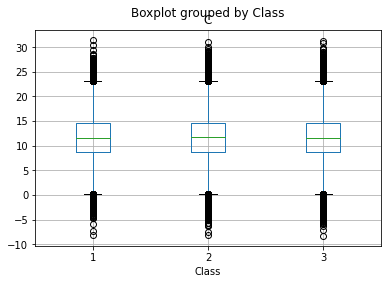

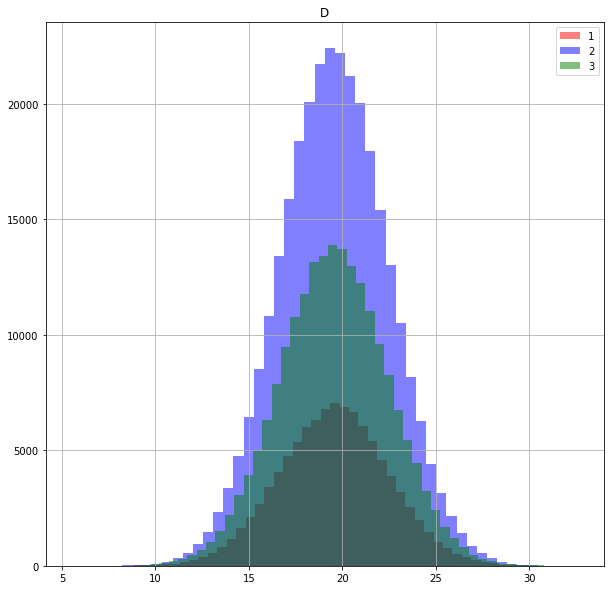

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

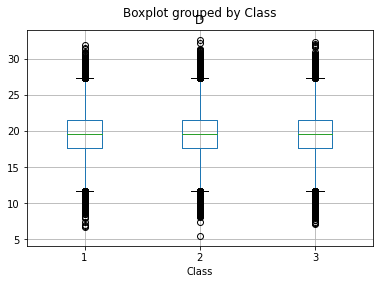

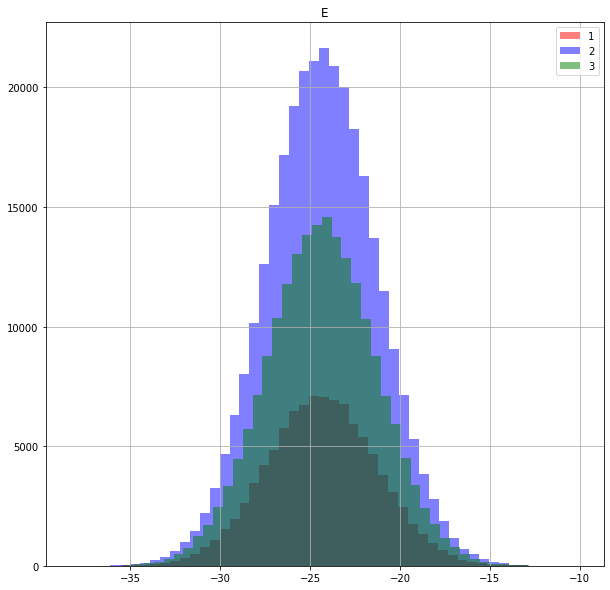

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

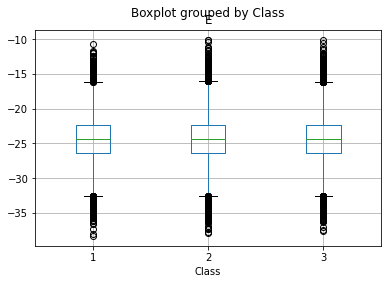

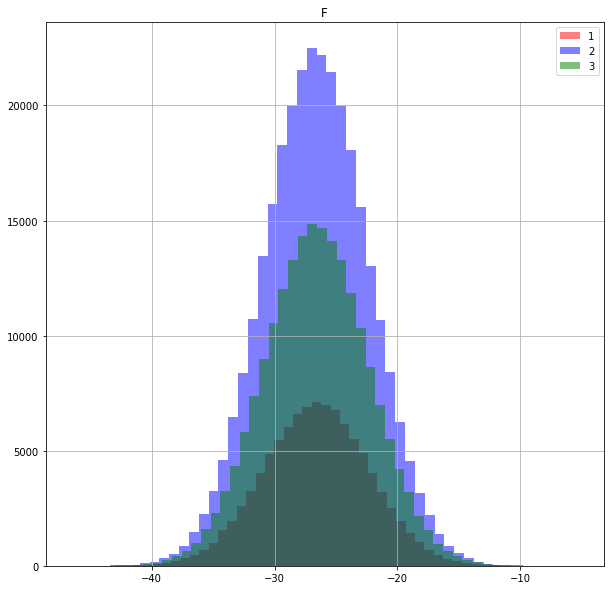

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

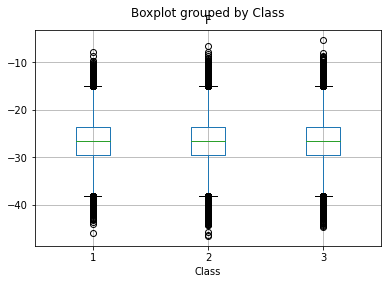

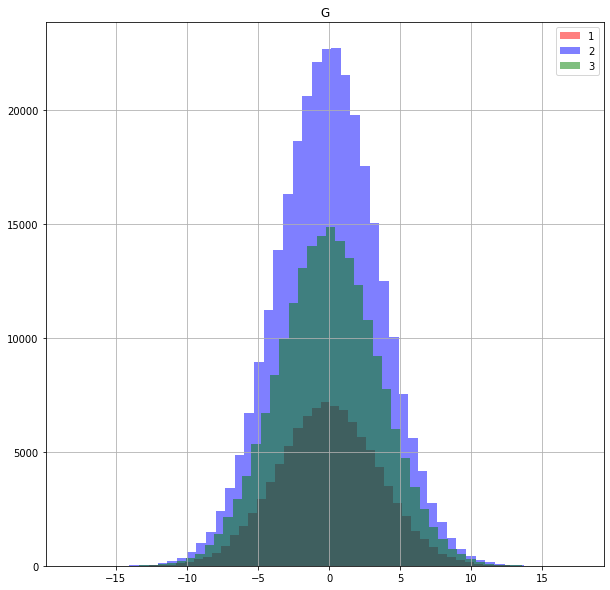

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

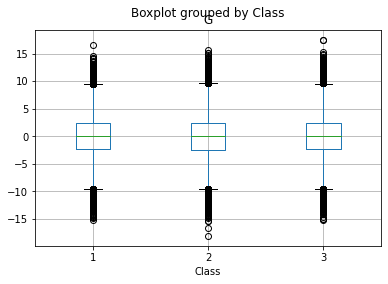

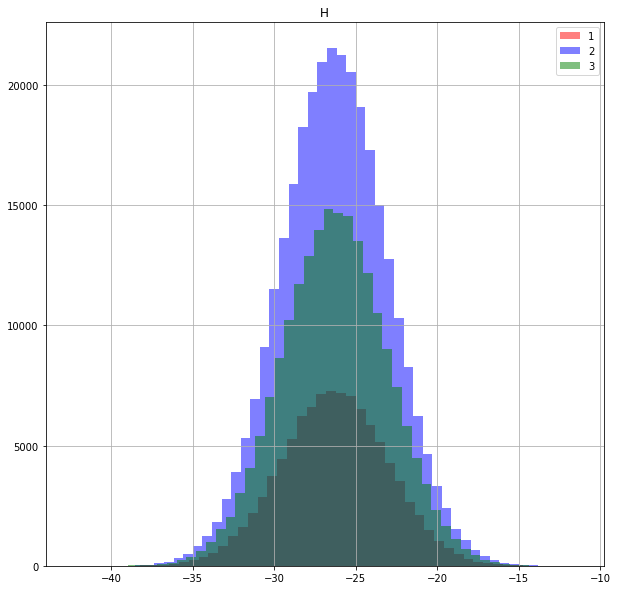

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

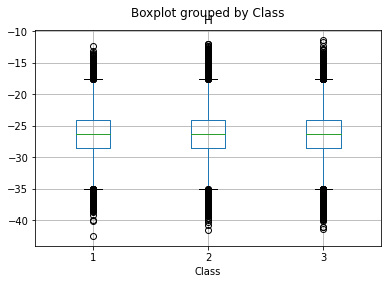

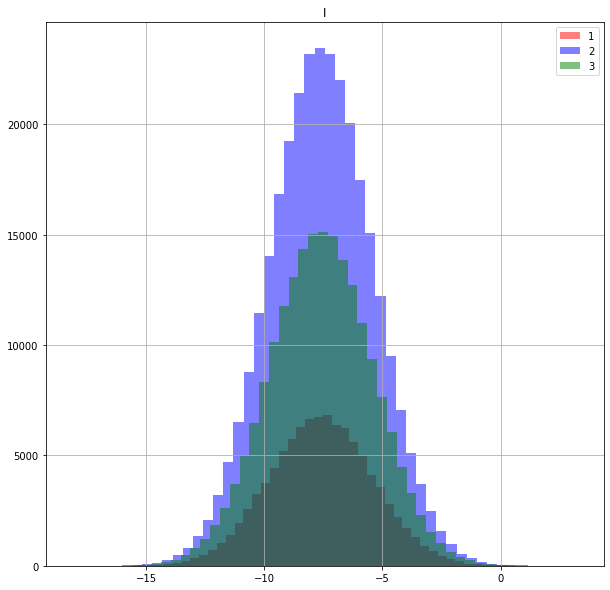

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

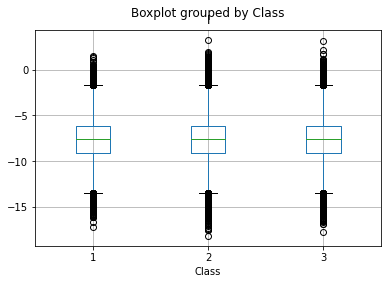

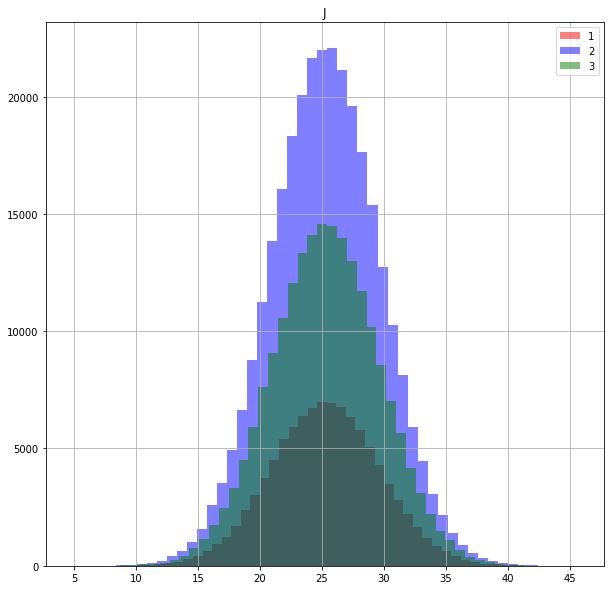

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

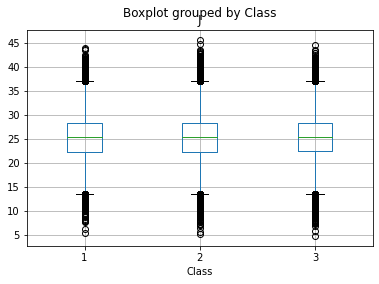

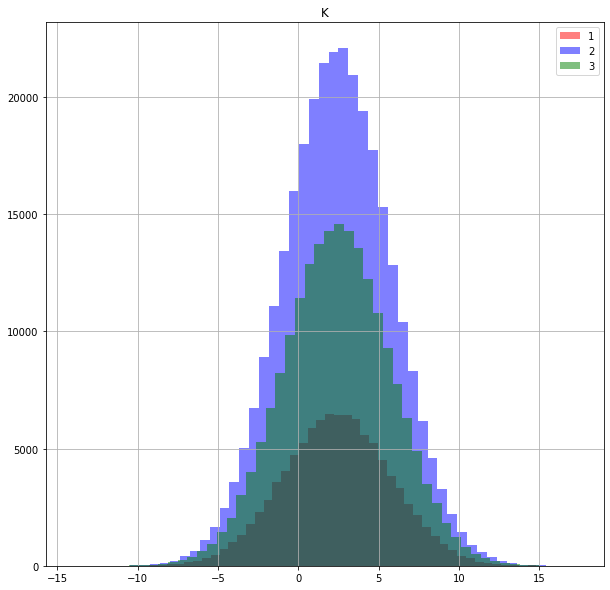

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

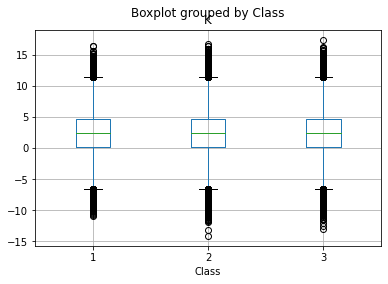

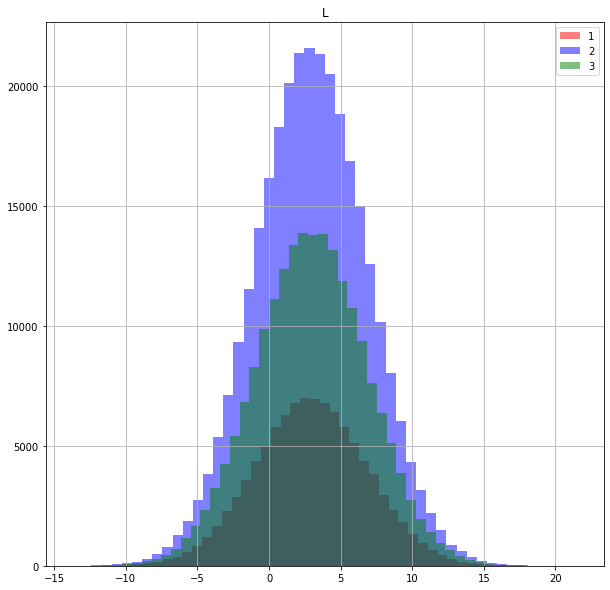

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

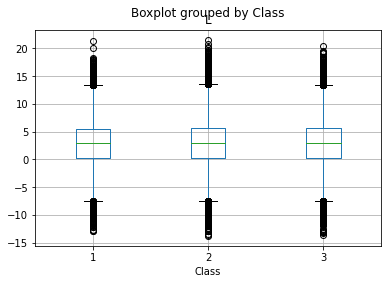

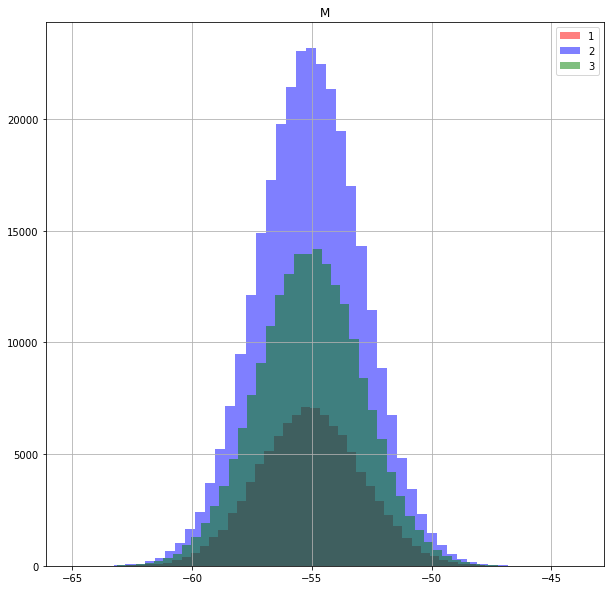

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

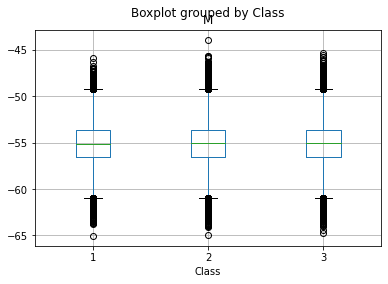

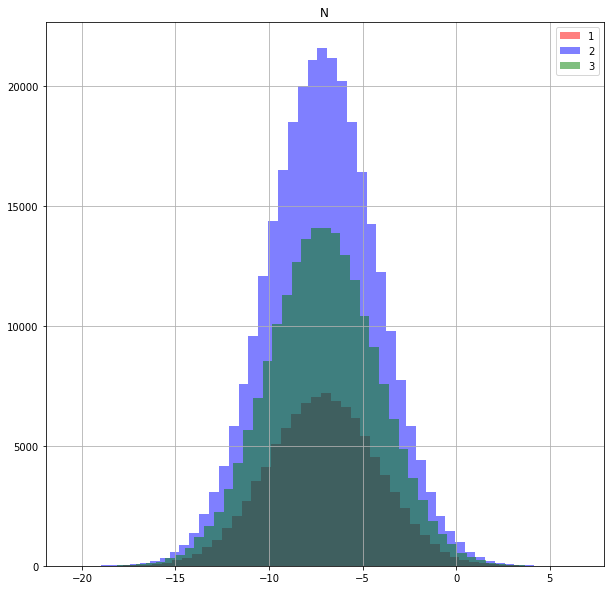

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

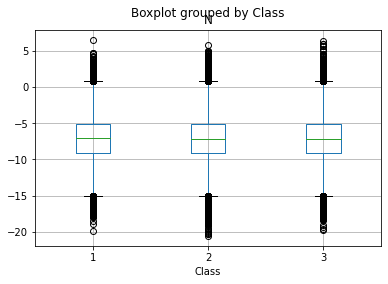

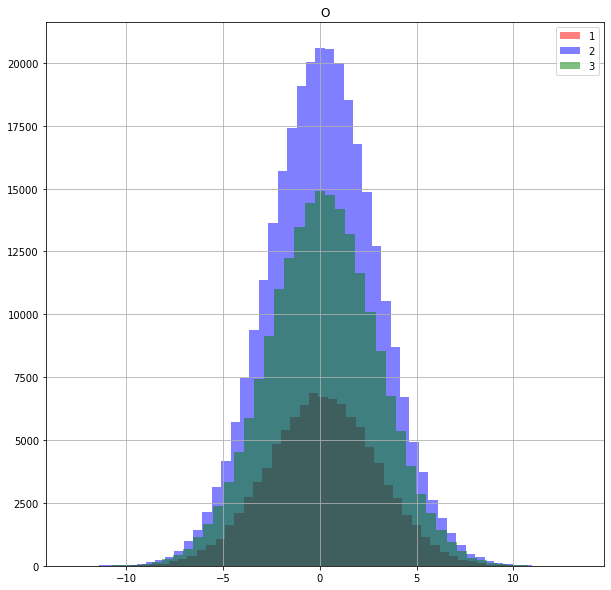

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

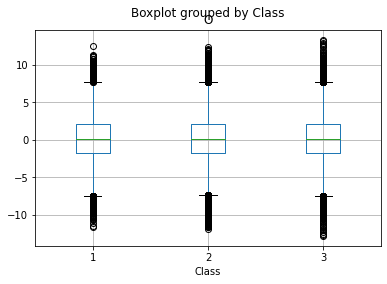

In [ ]:
#histograms and box plots for numerical features
for col in clust0.columns.drop('Class'):
  plt.figure(figsize=(10,10))
  plt.title(col)
  clust0[clust0['Class'] == 1][col].hist(bins=50, alpha = 0.5, label='1', color = 'red')
  clust0[clust0['Class'] == 2][col].hist(bins=50, alpha = 0.5, label='2', color = 'blue')
  clust0[clust0['Class'] == 3][col].hist(bins=50, alpha = 0.5, label='3', color = 'green')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,10))
  clust0.boxplot(column = col, by = 'Class');
  plt.title(col)
  plt.show()

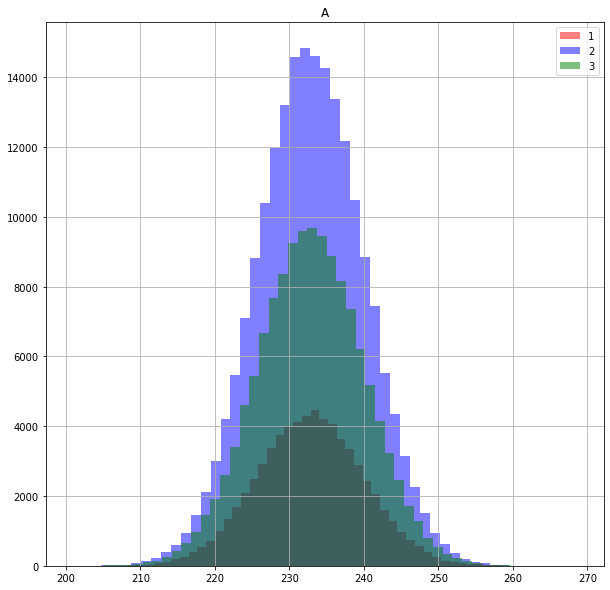

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

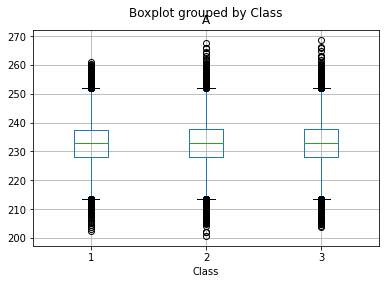

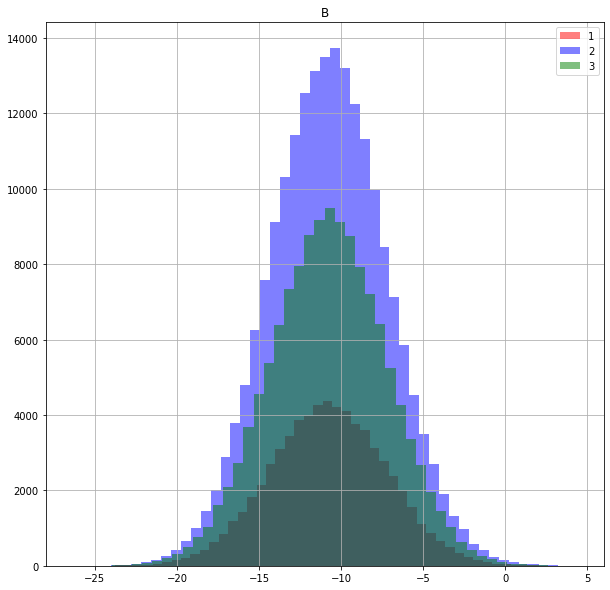

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

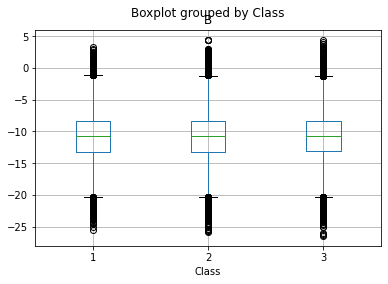

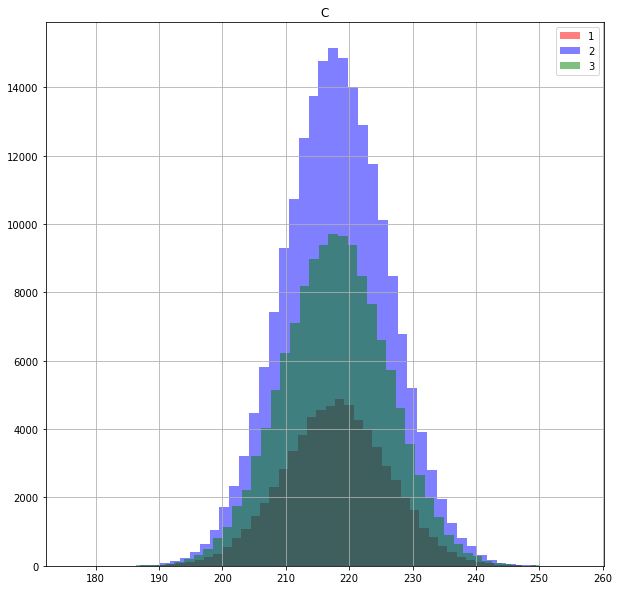

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

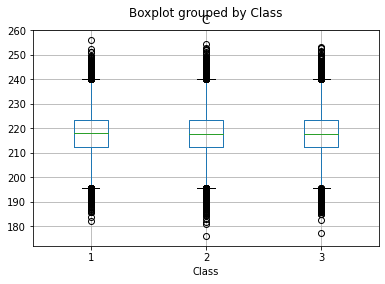

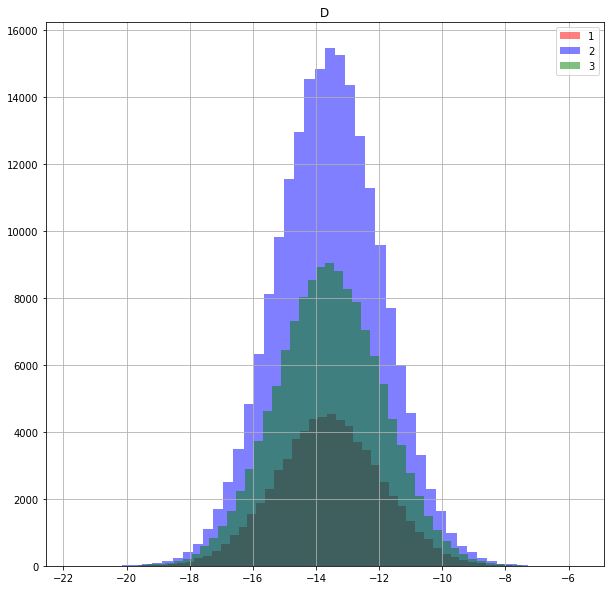

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

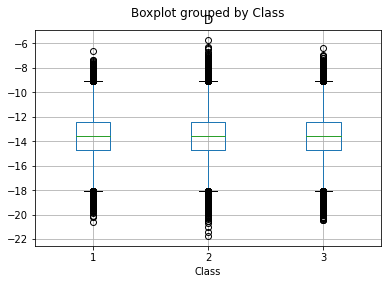

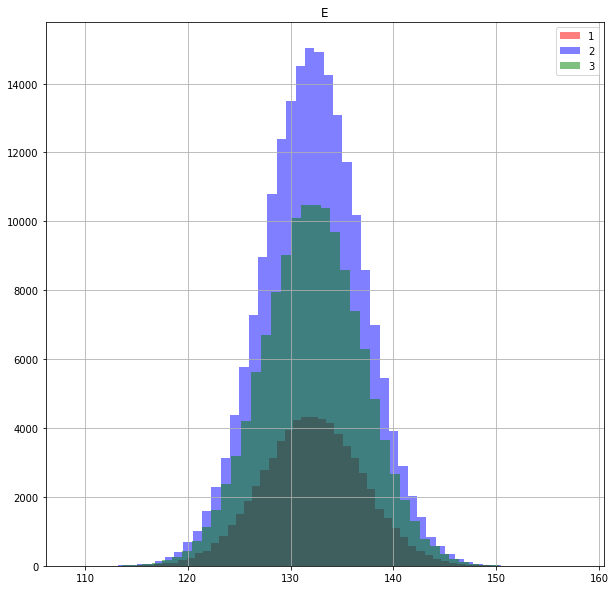

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

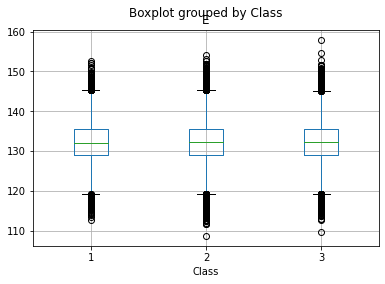

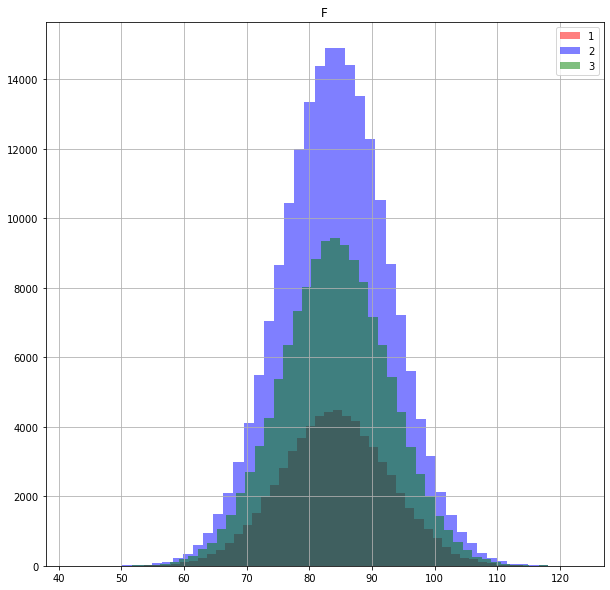

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

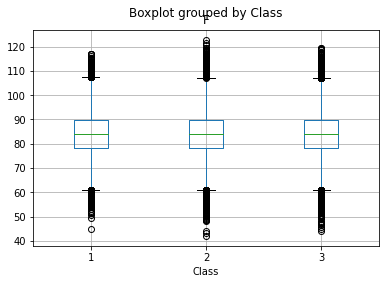

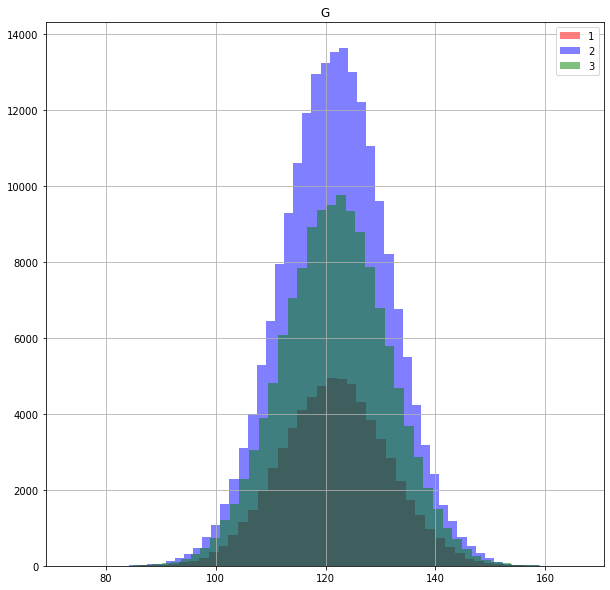

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

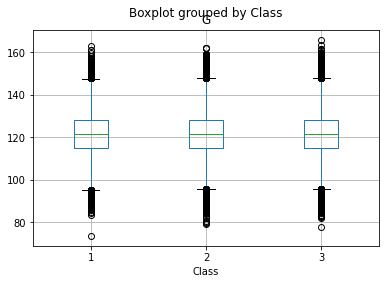

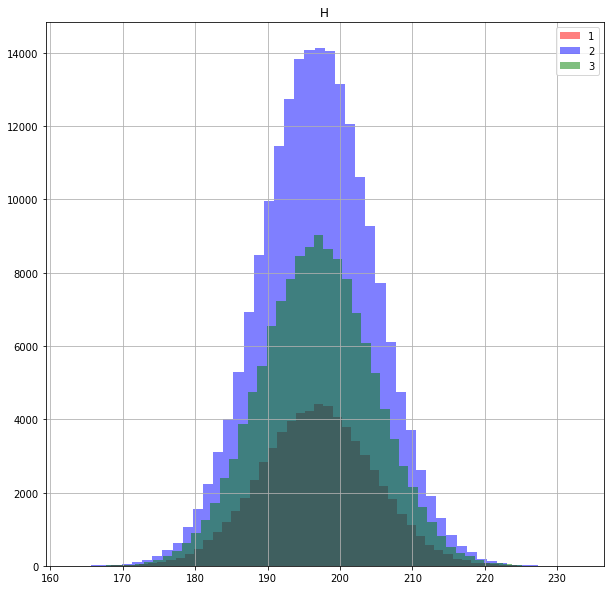

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

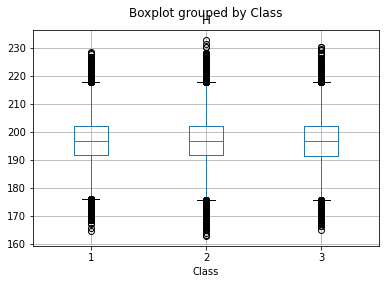

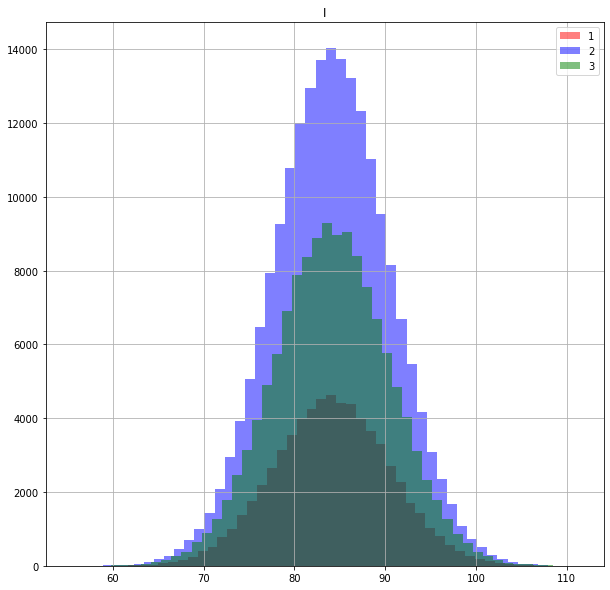

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

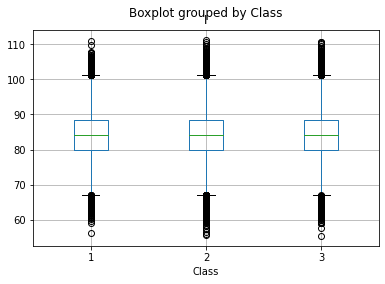

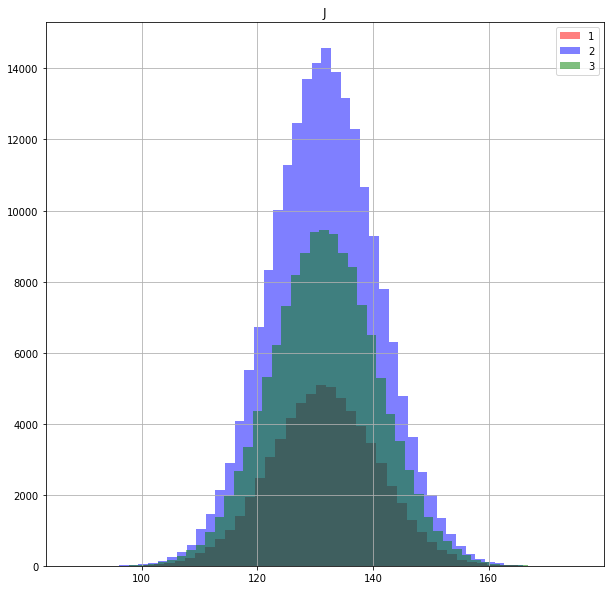

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

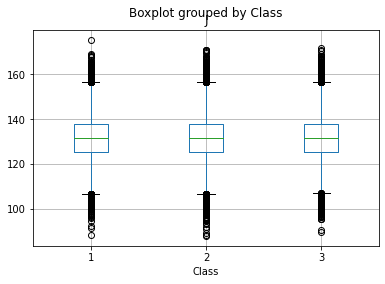

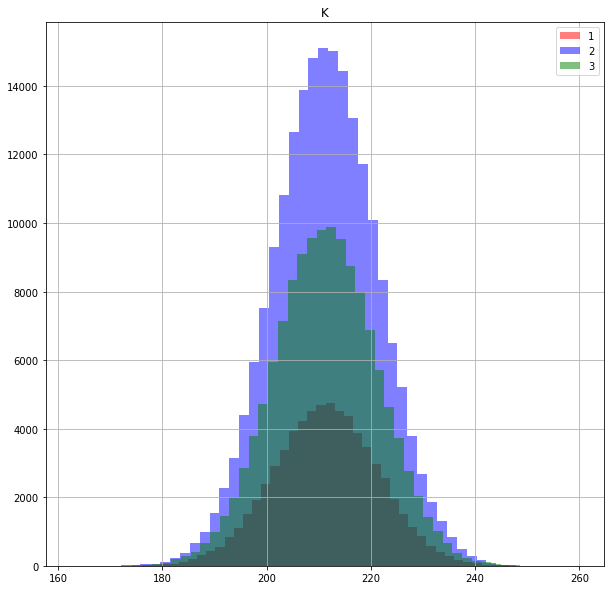

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

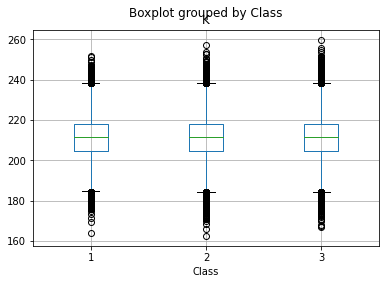

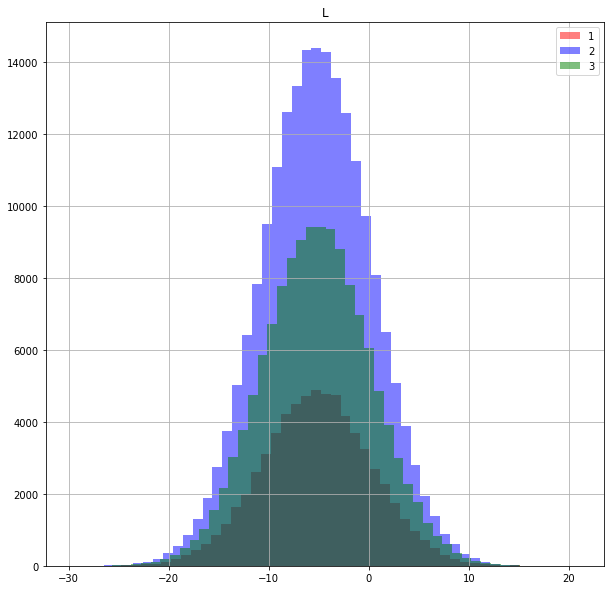

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

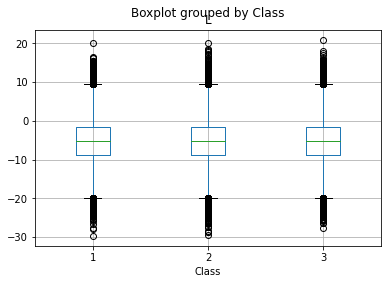

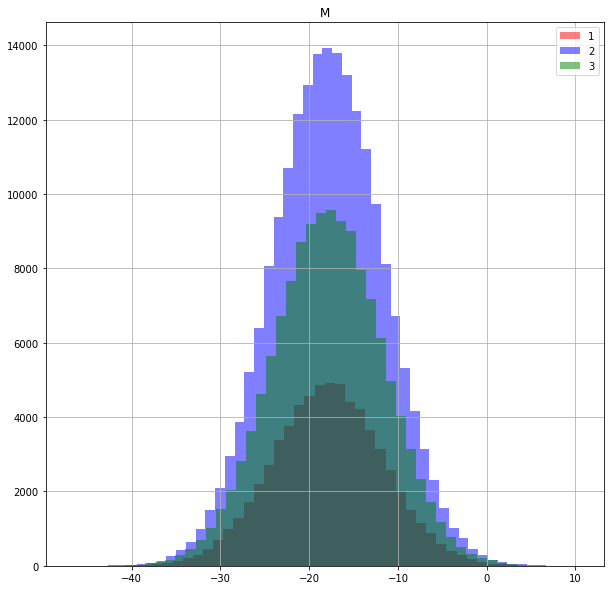

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

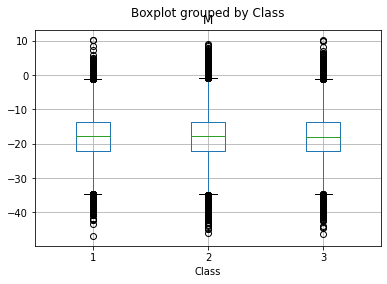

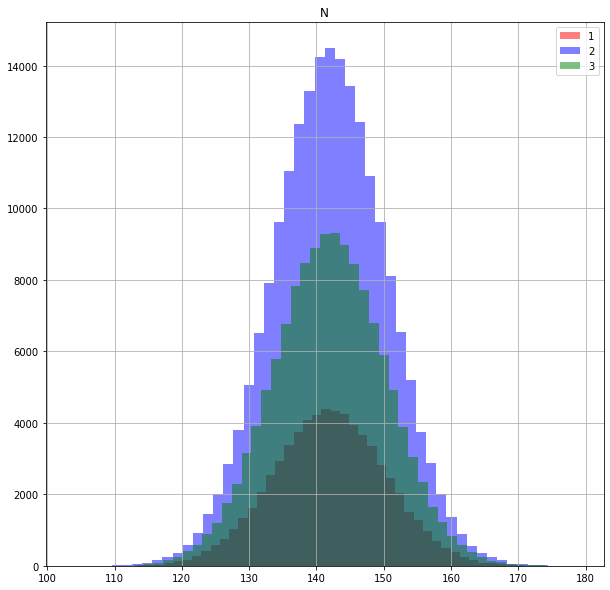

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

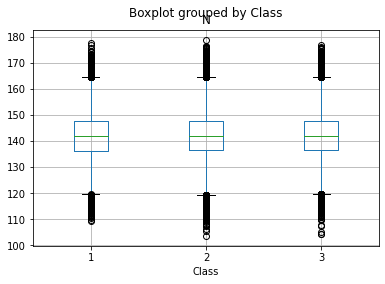

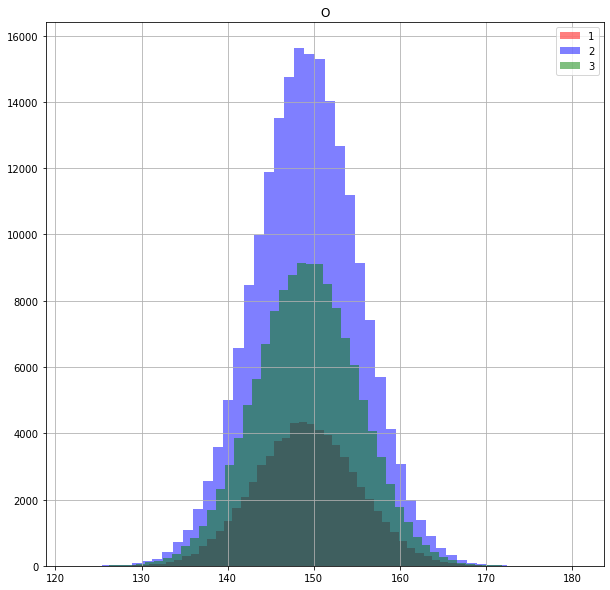

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

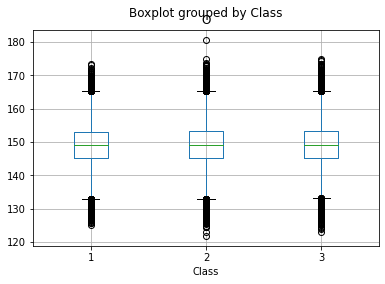

In [ ]:
#histograms and box plots for numerical features
for col in clust1.columns.drop('Class'):
  plt.figure(figsize=(10,10))
  plt.title(col)
  clust1[clust1['Class'] == 1][col].hist(bins=50, alpha = 0.5, label='1', color = 'red')
  clust1[clust1['Class'] == 2][col].hist(bins=50, alpha = 0.5, label='2', color = 'blue')
  clust1[clust1['Class'] == 3][col].hist(bins=50, alpha = 0.5, label='3', color = 'green')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,10))
  clust1.boxplot(column = col, by = 'Class');
  plt.title(col)
  plt.show()

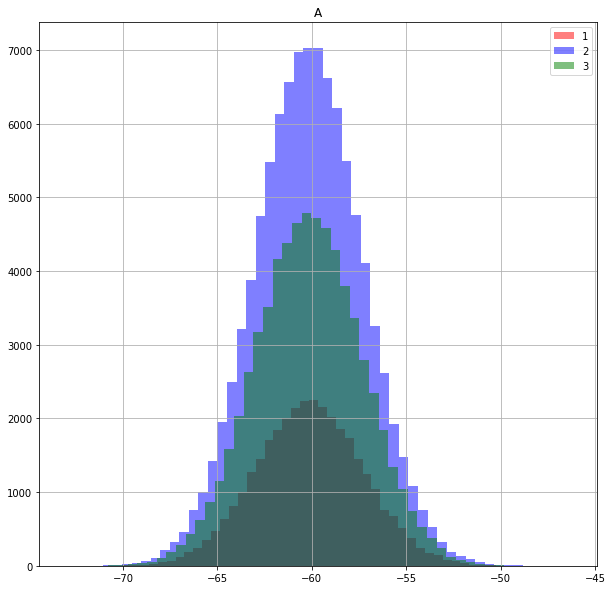

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

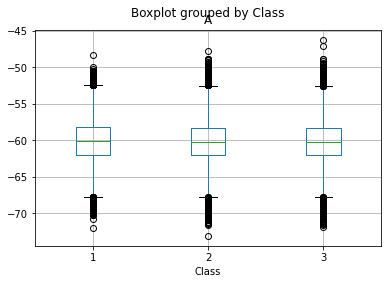

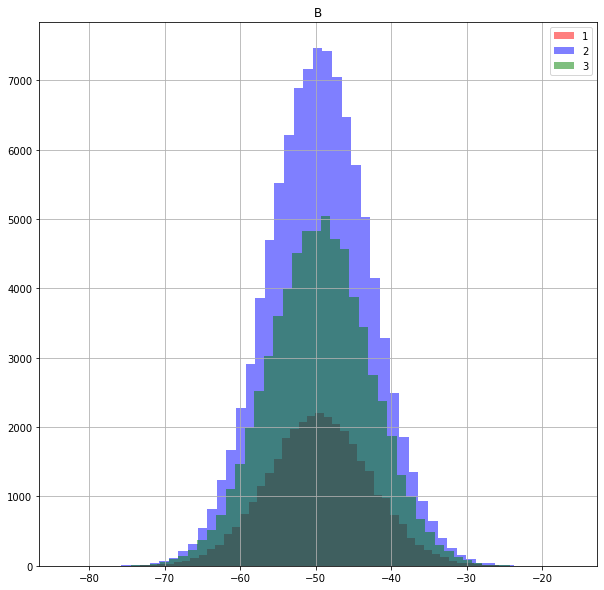

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

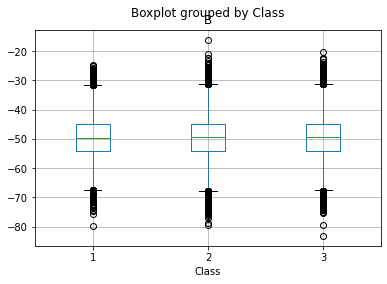

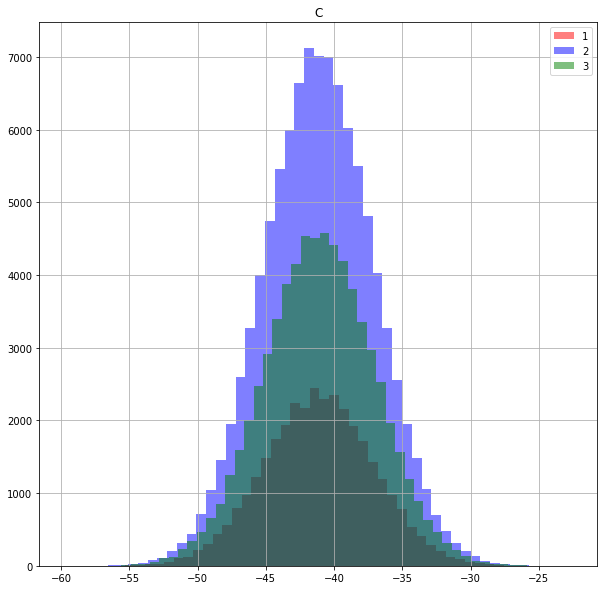

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

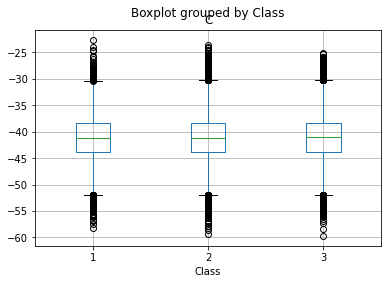

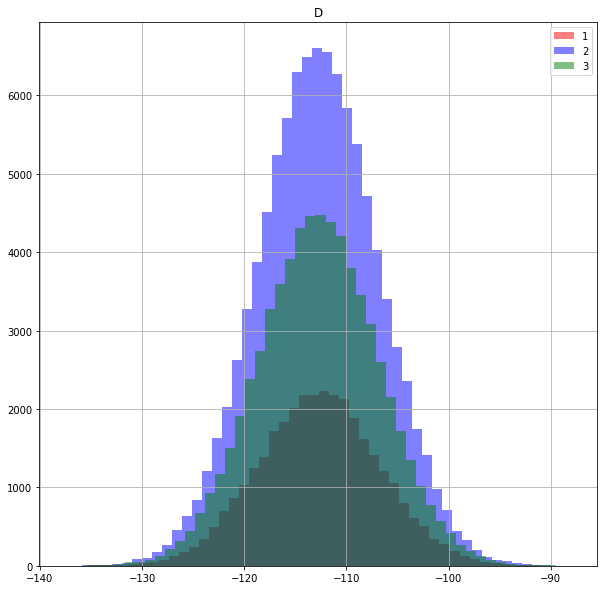

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

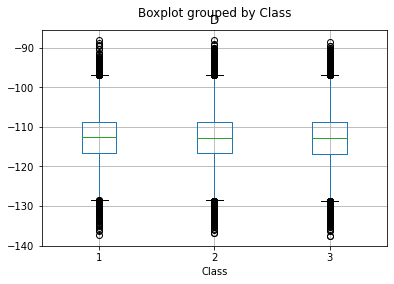

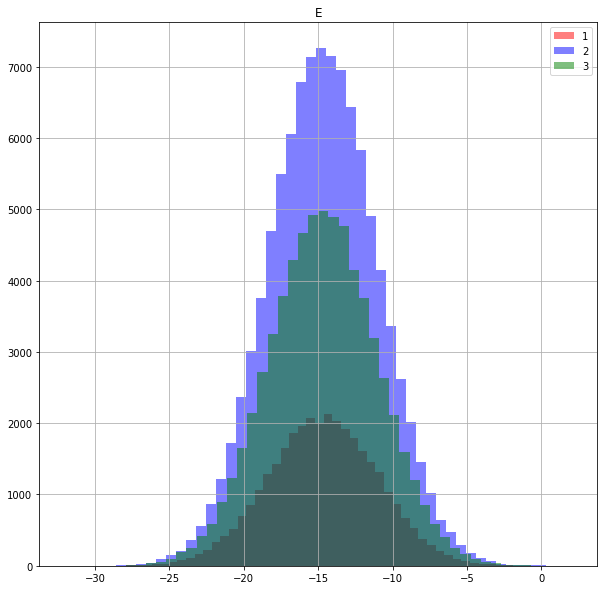

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

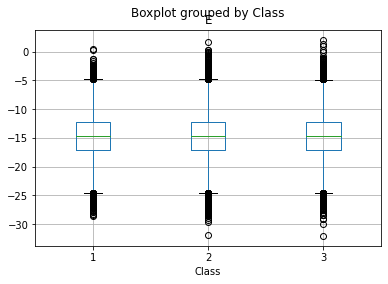

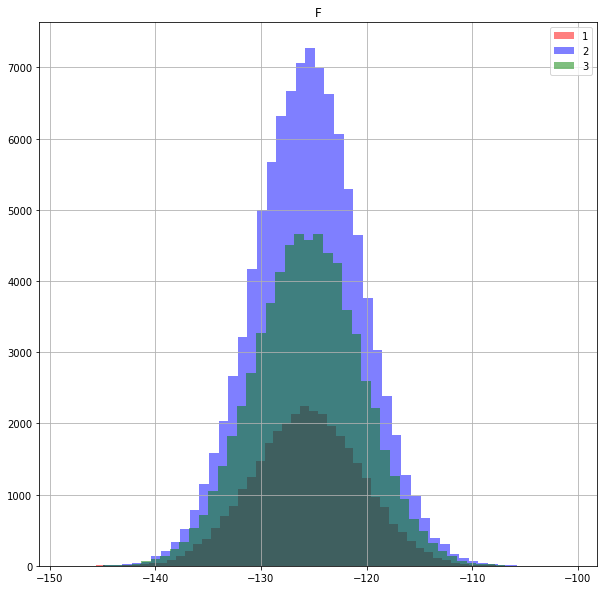

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

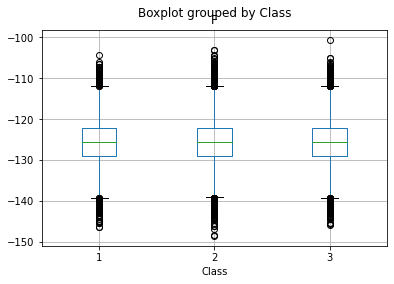

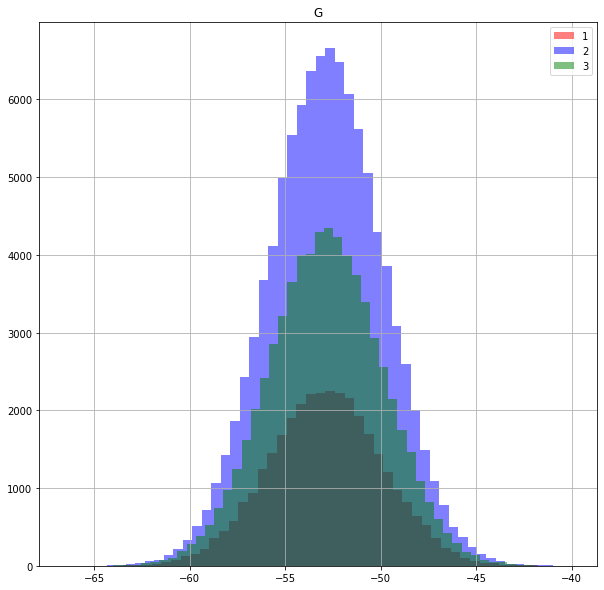

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

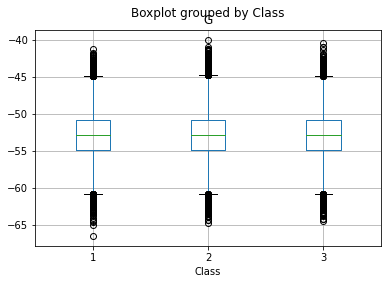

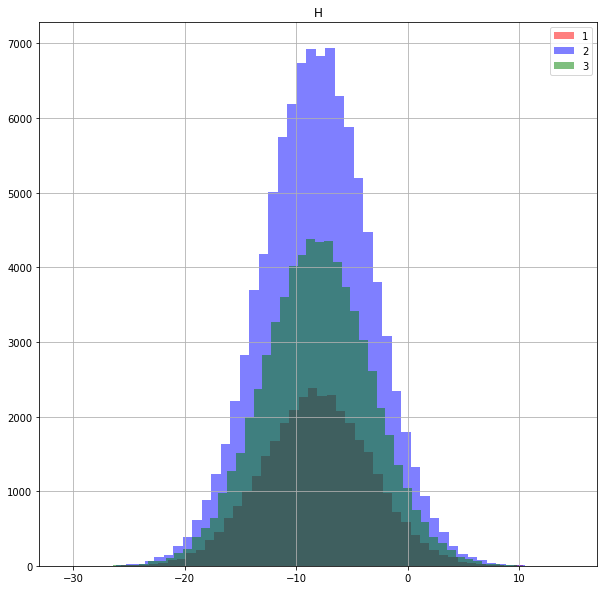

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

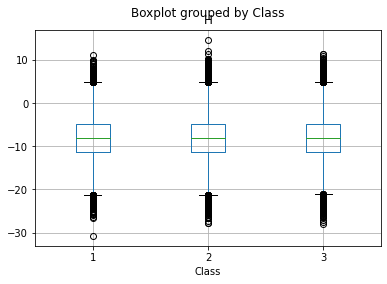

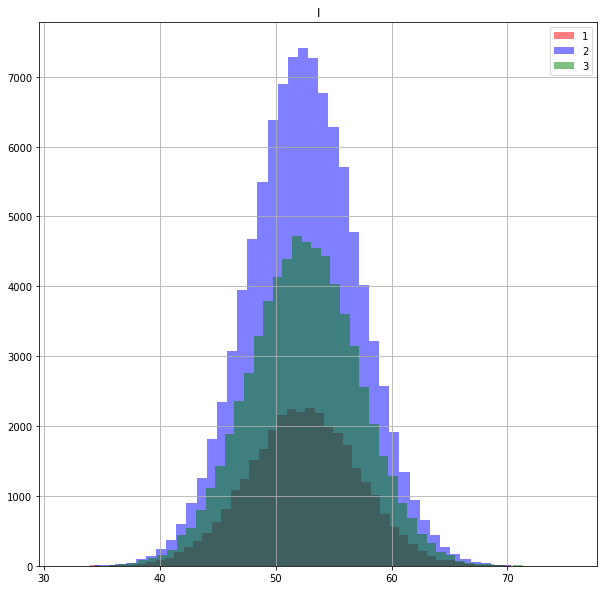

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

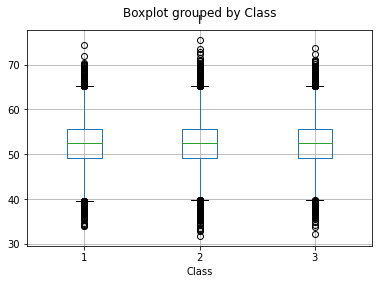

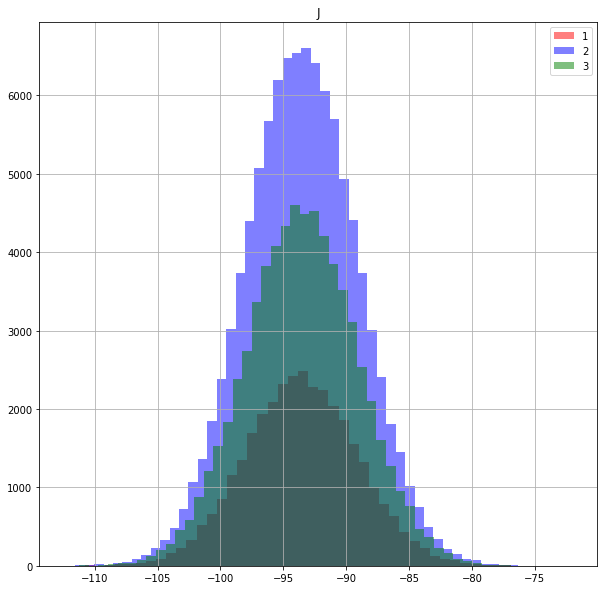

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

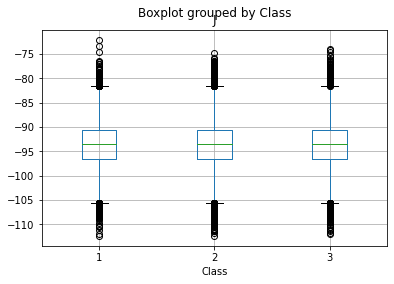

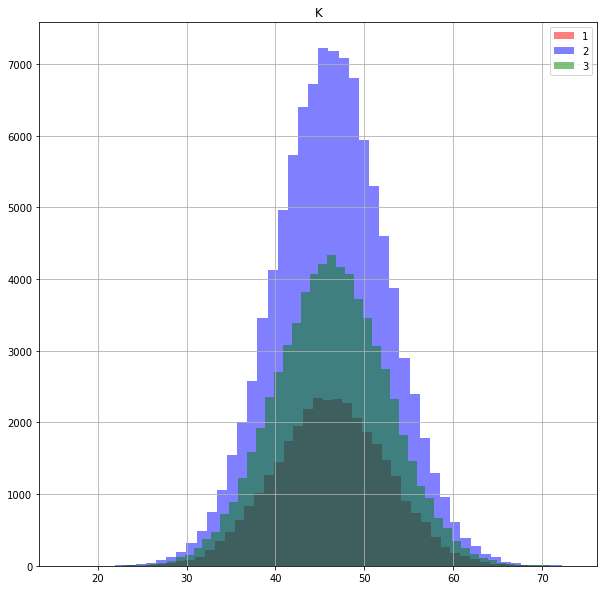

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

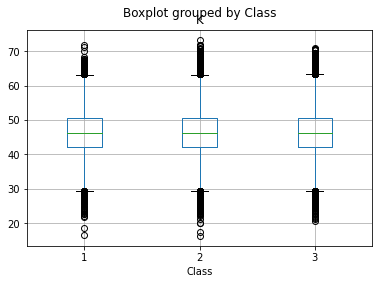

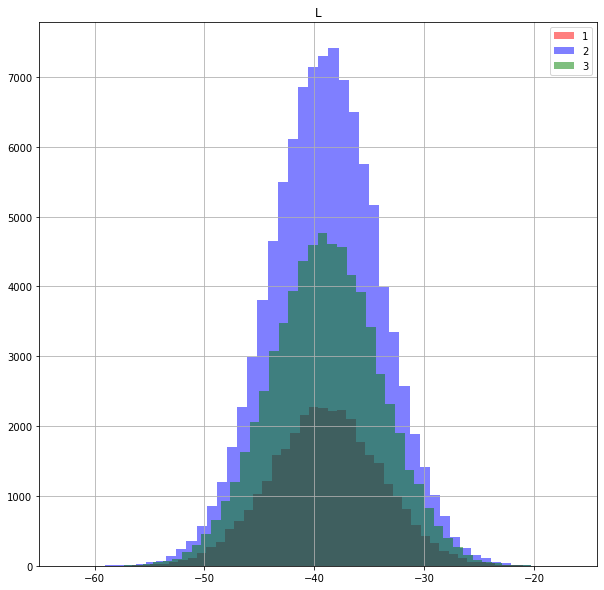

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

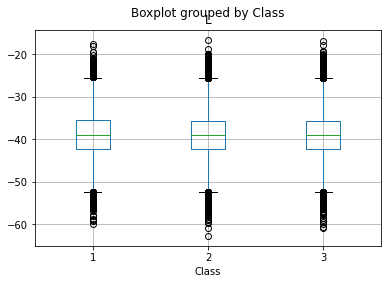

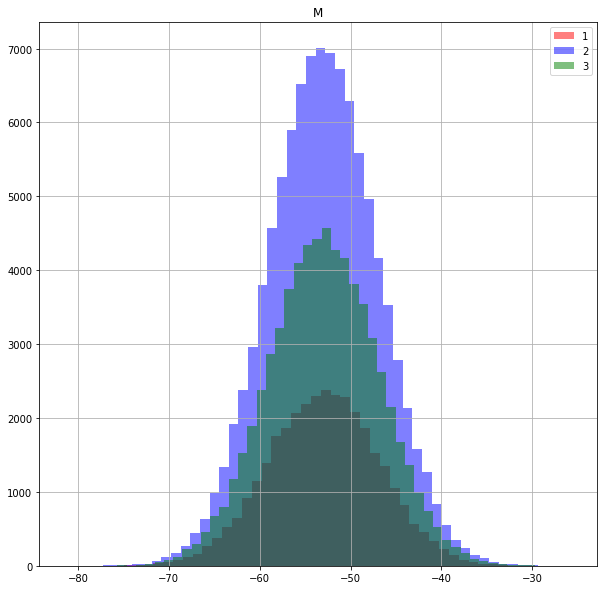

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

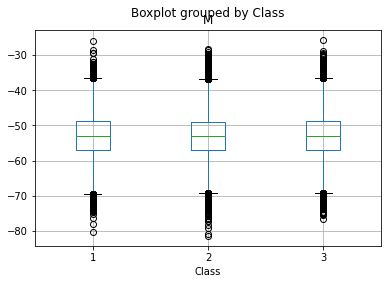

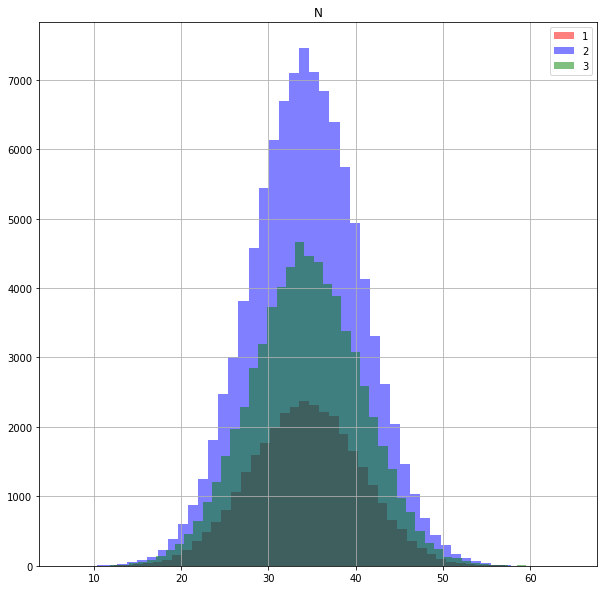

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

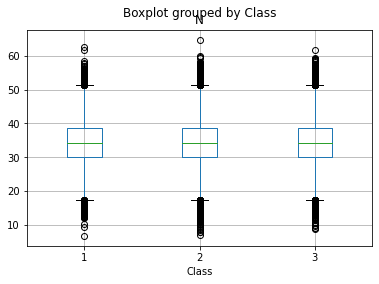

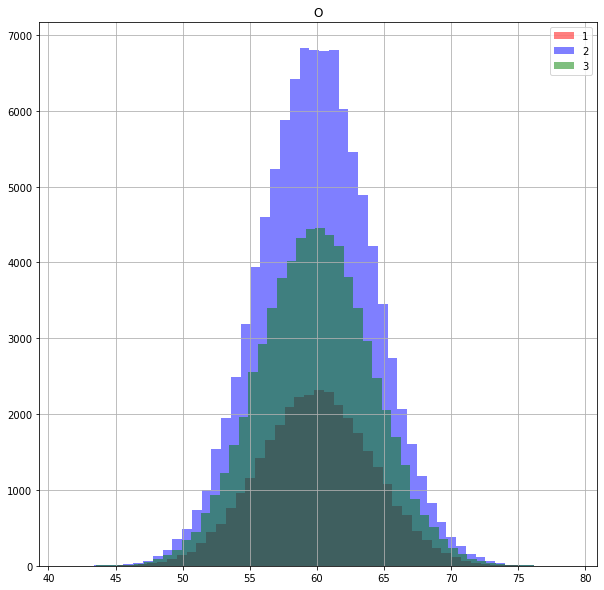

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x720 with 0 Axes>

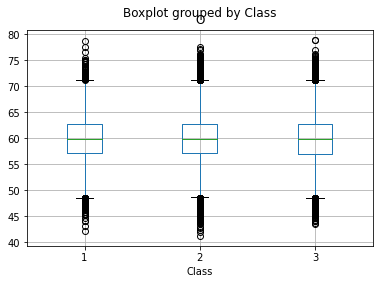

In [ ]:
#histograms and box plots for numerical features
for col in clust2.columns.drop('Class'):
  plt.figure(figsize=(10,10))
  plt.title(col)
  clust2[clust2['Class'] == 1][col].hist(bins=50, alpha = 0.5, label='1', color = 'red')
  clust2[clust2['Class'] == 2][col].hist(bins=50, alpha = 0.5, label='2', color = 'blue')
  clust2[clust2['Class'] == 3][col].hist(bins=50, alpha = 0.5, label='3', color = 'green')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,10))
  clust2.boxplot(column = col, by = 'Class');
  plt.title(col)
  plt.show()

After plotting the distributions of each feature per class taking each cluster as its own dataset, I notice that now instead of the plot for each feature having 3 peaks - it has only one. My guess is that this means that the data indeed tended to categorize itself into 3 major categories that the classes were part of. 

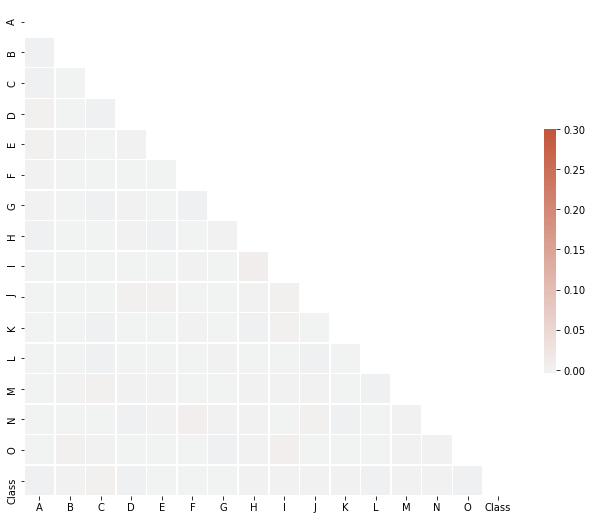

In [ ]:
corr = clust2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
pca = PCA(n_components=2) # Reducing the number of components to three.
principal_components = pca.fit_transform(clust0) #perform PCA
principal_df = pd.DataFrame(data = principal_components
             , columns = ['pc1', 'pc2'])
df_pca = pd.concat([principal_df, clust0[['Class']]], axis = 1)

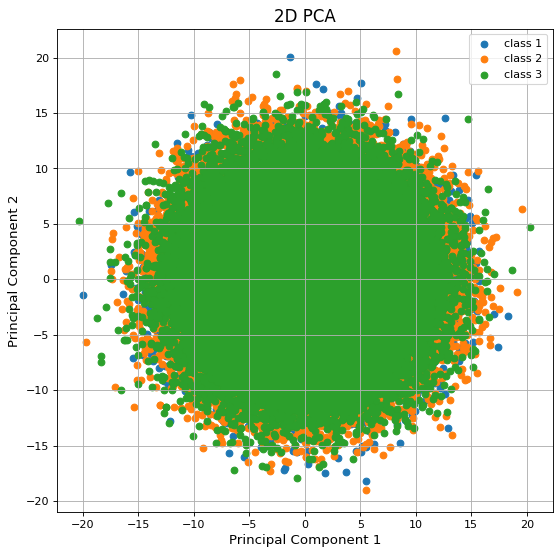

In [ ]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df_pca.loc[df_pca['Class'] == 1, 'pc1'], 
                df_pca.loc[df_pca['Class'] == 1, 'pc2'])
plt.scatter(df_pca.loc[df_pca['Class'] == 2, 'pc1'], 
                df_pca.loc[df_pca['Class'] == 2, 'pc2'])
plt.scatter(df_pca.loc[df_pca['Class'] == 3, 'pc1'], 
                df_pca.loc[df_pca['Class'] == 3, 'pc2'])
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['class 1', 'class 2', 'class 3'])
plt.grid()

In [ ]:
clust0_s = spark.createDataFrame(clust0) 
clust0_s.printSchema()
clust0_s.show()

root
 |-- A: double (nullable = true)
 |-- B: double (nullable = true)
 |-- C: double (nullable = true)
 |-- D: double (nullable = true)
 |-- E: double (nullable = true)
 |-- F: double (nullable = true)
 |-- G: double (nullable = true)
 |-- H: double (nullable = true)
 |-- I: double (nullable = true)
 |-- J: double (nullable = true)
 |-- K: double (nullable = true)
 |-- L: double (nullable = true)
 |-- M: double (nullable = true)
 |-- N: double (nullable = true)
 |-- O: double (nullable = true)
 |-- Class: long (nullable = true)

+-------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----+
|                  A|                  B|                 C|                 D|                  E|                  F|                   G|                  

Here, I am creating an Scikit-Learn based pipeline with the final model to be used.

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
steps = [('scaler', StandardScaler()), 
         ('PCA', PCA(n_components=3)), 
         ('KMeans', KMeans(n_clusters=3,
                    init='k-means++'),)]
pipeline = Pipeline(steps)

In [ ]:
x = df.drop(columns=['Class'])
# Separating out the target
y = df.loc[:,['Class']]
clust_labels = pipeline.fit_predict(x);

KeyboardInterrupt: ignored

In [ ]:
clust_labels

In [ ]:
!pip install skl2onnx

In [ ]:
!pip install onnxruntime

In [ ]:
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

input_types = dict([(x, FloatTensorType([None, 1])) for x in df.drop(columns=['Class']).columns.values])

try:
    model_onnx = convert_sklearn(pipeline,
                                 'onnx_pipeline',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("onnx_pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [ ]:
import onnxruntime as rt
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in df.drop(columns=['Class']).to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("onnx_pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

**Conclusion** 

In conclusion, a dataset can sometimes have mistaken labeling and assuming that the labeling is accurate can get in the way. Exploratory data analysis can help spot this and clustering algorithms can help relabel the data points the right way. Skipping exploratory data analysis and building modelsa right away on the initial data can be dangerous and lead to hours of wasted effort tryiung to improve model accuracy for a data set that would be impossible to model. Hence, it is crucial to have deep insight into the dataset to be modeled and to make an educated choice of the type of modeling to be performed. 



**Data Sources, Source Code, Bibliography**

https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d


https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be


https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114


https://susant.medium.com/apache-spark-in-google-collaboratory-in-3-steps-e0acbba654e6


https://towardsdatascience.com/k-means-clustering-using-pyspark-on-big-data-6214beacdc8b


https://spark.apache.org/docs/1.5.1/api/python/pyspark.ml.html#pyspark.ml.feature.PCA

https://towardsdatascience.com/the-most-complete-guide-to-pyspark-dataframes-2702c343b2e8


https://medium.com/@connor.anderson_42477/hot-or-not-heatmaps-and-correlation-matrix-plots-940088fa2806